## Training 

In [1]:
import tensorflow as tf
import collections
#from tensorflow import keras
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalMaxPool2D,GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
#inputshape=(height,width,deep)

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import h5py
import os 
from PIL import Image
import sklearn
from sklearn import preprocessing
import scipy
import numpy as np
import PIL.ImageOps
import random
from keras import backend as K
from keras.models import load_model
import numpy as np
def get_layer_output(model,x,index=-1):
    layer = K.function([model.input],[model.layers[index].output])
    return layer([x])[0]

In [2]:
train_dataset = h5py.File("alphabet_dataset_20200725-1.h5",'r')
X_train = np.array(train_dataset['x_train'][:])
Y_train = np.array(train_dataset['y_train'][:])
X_test = np.array(train_dataset['x_test'][:])
Y_test = np.array(train_dataset['y_test'][:])
train_dataset.close()

In [3]:
class_names=["B","A","C","D","E","F","G","H",]
print(len(X_train))
for i in range(64):
    print(np.squeeze(X_train[i]),np.sum(X_train[i]==1))
    print(class_names[int(Y_train[i])])

6400
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 35
D
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 15
E
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 

In [4]:
print("number of traning examples = "+str(X_train.shape[0]))
print("number of test examples = "+str(X_test.shape[0]))
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))
train_data=(X_train,Y_train)
test_data=(X_test,Y_test)

number of traning examples = 6400
number of test examples = 1600
X_train shape:(6400, 10, 10, 1)
Y_train shape:(6400, 1)
X_test shape:(1600, 10, 10, 1)
Y_test shape:(1600, 1)


In [5]:
#Build a model
def Pimodel(input_shape):
    X_input = Input(shape=input_shape)
    X=ZeroPadding2D(padding=(1,1))(X_input)
    X=Conv2D(1,kernel_size=(3,6),strides=(3,6),use_bias=None)(X)
    X=Activation('relu')(X)
    #X=Conv2D(1,kernel_size=(2,3),strides=(2,2))(X)
    #X=Activation("sigmoid")(X)
    X=Flatten()(X)
    Y=Activation('softmax')(X)
    model=Model(inputs=X_input,outputs=Y,name="JSmodel")
    return model

In [6]:
picmodel = Pimodel((10,10,1))

In [7]:
import keras
picmodel.compile(optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,decay=0.0),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
picmodel.summary()

Model: "JSmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 10, 1)]       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 2, 1)           18        
_________________________________________________________________
activation (Activation)      (None, 4, 2, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_______________________________________________________________

In [9]:
history=picmodel.fit(x=X_train,y=Y_train,batch_size=150,epochs=250,validation_data=(X_test,Y_test))

Epoch 1/250
43/43 [==============================] - 0s 8ms/step - loss: 2.1239 - accuracy: 0.0494 - val_loss: 2.1080 - val_accuracy: 0.0688
Epoch 2/250
43/43 [==============================] - 0s 6ms/step - loss: 2.0813 - accuracy: 0.1238 - val_loss: 2.0543 - val_accuracy: 0.1706
Epoch 3/250
43/43 [==============================] - 0s 3ms/step - loss: 2.0193 - accuracy: 0.2161 - val_loss: 1.9859 - val_accuracy: 0.2463
Epoch 4/250
43/43 [==============================] - 0s 3ms/step - loss: 1.9537 - accuracy: 0.2806 - val_loss: 1.9172 - val_accuracy: 0.2994
Epoch 5/250
43/43 [==============================] - 0s 3ms/step - loss: 1.8829 - accuracy: 0.3194 - val_loss: 1.8433 - val_accuracy: 0.3363
Epoch 6/250
43/43 [==============================] - 0s 3ms/step - loss: 1.8092 - accuracy: 0.3577 - val_loss: 1.7725 - val_accuracy: 0.3725
Epoch 7/250
43/43 [==============================] - 0s 3ms/step - loss: 1.7375 - accuracy: 0.3916 - val_loss: 1.6965 - val_accuracy: 0.4181
Epoch 8/250
4

Epoch 59/250
43/43 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.8148 - val_loss: 0.6423 - val_accuracy: 0.8263
Epoch 60/250
43/43 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.8167 - val_loss: 0.6353 - val_accuracy: 0.8288
Epoch 61/250
43/43 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.8181 - val_loss: 0.6285 - val_accuracy: 0.8300
Epoch 62/250
43/43 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.8192 - val_loss: 0.6218 - val_accuracy: 0.8313
Epoch 63/250
43/43 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.8213 - val_loss: 0.6153 - val_accuracy: 0.8313
Epoch 64/250
43/43 [==============================] - 0s 3ms/step - loss: 0.6230 - accuracy: 0.8222 - val_loss: 0.6089 - val_accuracy: 0.8325
Epoch 65/250
43/43 [==============================] - 0s 3ms/step - loss: 0.6167 - accuracy: 0.8247 - val_loss: 0.6027 - val_accuracy: 0.8369
Epoch 

43/43 [==============================] - 0s 3ms/step - loss: 0.4001 - accuracy: 0.9198 - val_loss: 0.3908 - val_accuracy: 0.9206
Epoch 117/250
43/43 [==============================] - 0s 4ms/step - loss: 0.3972 - accuracy: 0.9202 - val_loss: 0.3880 - val_accuracy: 0.9225
Epoch 118/250
43/43 [==============================] - 0s 3ms/step - loss: 0.3944 - accuracy: 0.9205 - val_loss: 0.3853 - val_accuracy: 0.9225
Epoch 119/250
43/43 [==============================] - 0s 3ms/step - loss: 0.3916 - accuracy: 0.9206 - val_loss: 0.3826 - val_accuracy: 0.9219
Epoch 120/250
43/43 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.9208 - val_loss: 0.3799 - val_accuracy: 0.9219
Epoch 121/250
43/43 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.9214 - val_loss: 0.3773 - val_accuracy: 0.9244
Epoch 122/250
43/43 [==============================] - 0s 3ms/step - loss: 0.3834 - accuracy: 0.9222 - val_loss: 0.3747 - val_accuracy: 0.9287
Epoch 123/250

43/43 [==============================] - 0s 3ms/step - loss: 0.2806 - accuracy: 0.9511 - val_loss: 0.2756 - val_accuracy: 0.9550
Epoch 174/250
43/43 [==============================] - 0s 3ms/step - loss: 0.2791 - accuracy: 0.9516 - val_loss: 0.2742 - val_accuracy: 0.9550
Epoch 175/250
43/43 [==============================] - 0s 3ms/step - loss: 0.2776 - accuracy: 0.9511 - val_loss: 0.2727 - val_accuracy: 0.9550
Epoch 176/250
43/43 [==============================] - 0s 3ms/step - loss: 0.2761 - accuracy: 0.9513 - val_loss: 0.2713 - val_accuracy: 0.9550
Epoch 177/250
43/43 [==============================] - 0s 3ms/step - loss: 0.2747 - accuracy: 0.9514 - val_loss: 0.2700 - val_accuracy: 0.9550
Epoch 178/250
43/43 [==============================] - 0s 3ms/step - loss: 0.2732 - accuracy: 0.9516 - val_loss: 0.2686 - val_accuracy: 0.9550
Epoch 179/250
43/43 [==============================] - 0s 3ms/step - loss: 0.2718 - accuracy: 0.9514 - val_loss: 0.2672 - val_accuracy: 0.9550
Epoch 180/250

43/43 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9609 - val_loss: 0.2124 - val_accuracy: 0.9638
Epoch 231/250
43/43 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.9609 - val_loss: 0.2115 - val_accuracy: 0.9644
Epoch 232/250
43/43 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.9611 - val_loss: 0.2107 - val_accuracy: 0.9644
Epoch 233/250
43/43 [==============================] - 0s 4ms/step - loss: 0.2121 - accuracy: 0.9628 - val_loss: 0.2098 - val_accuracy: 0.9644
Epoch 234/250
43/43 [==============================] - 0s 3ms/step - loss: 0.2112 - accuracy: 0.9617 - val_loss: 0.2091 - val_accuracy: 0.9638
Epoch 235/250
43/43 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9619 - val_loss: 0.2082 - val_accuracy: 0.9638
Epoch 236/250
43/43 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9627 - val_loss: 0.2074 - val_accuracy: 0.9644
Epoch 237/250

In [11]:
preds = picmodel.evaluate(x=X_test,y=Y_test)
print('Test Loss=' + str(preds[0]))
print("Test Accuacy ="+str(preds[1]))

50/50 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.9675
Test Loss=0.19677528738975525
Test Accuacy =0.9674999713897705


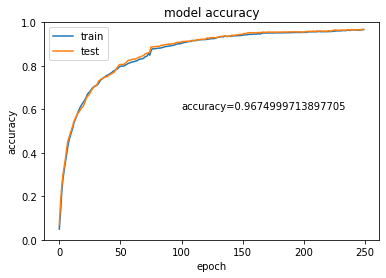

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1)) # Uncomment this when showing you model for pay raise
plt.text(100,0.6,"accuracy="+str(preds[1]))
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("accuary.png")

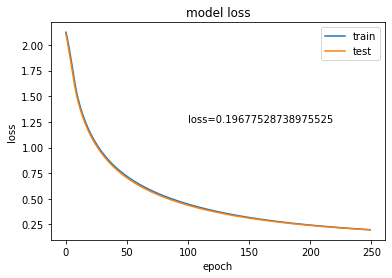

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.text(100,1.25,"loss="+str(preds[0]))
plt.legend(['train', 'test'], loc='best')
plt.savefig("loss.png")

## Check the weight and bias

In [14]:
picmodel = load_model("./alphabet_model_20200729.h5")

In [15]:
kernel_weights=np.squeeze(picmodel.get_weights())
#print(kernel_weights.flatten())
a1=np.squeeze(kernel_weights)[0:3,0:6].flatten()
print(kernel_weights)
N=abs(a1.flatten())[np.argmax(abs(a1.flatten()))]
print(N)
a1_nor=a1.flatten()/N
print(a1_nor)

[[ 1.0373114   7.549035    1.4696196  -1.5160872   0.15948755  1.5815539 ]
 [-6.677024   -2.5409868  -1.0440102   1.9445404   1.9279445  -0.8973275 ]
 [-8.051447    0.5946708   3.2355623   3.1867304   0.35500947 -1.5447552 ]]
8.051447
[ 0.12883541  0.9375998   0.18252863 -0.18829997  0.01980856  0.19643103
 -0.8292949  -0.3155938  -0.1296674   0.2415144   0.23945318 -0.11144922
 -1.          0.07385887  0.40186098  0.395796    0.04409263 -0.19186057]


In [16]:
picmodel.summary()

Model: "JSmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 10, 1)]       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 2, 1)           18        
_________________________________________________________________
activation_1 (Activation)    (None, 4, 2, 1)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_______________________________________________________________

In [17]:
# check the oupput

In [18]:
from keras import backend as K
from keras.models import load_model
import numpy
import random
import os,sys
def get_layer_output(model,x,index=0):
    layer = K.function([model.input],[model.layers[index].output])
    return layer([x])[0]

# the layer output 

In [19]:
from keras import backend as K
from keras.models import load_model
import numpy
import random
import os,sys
def get_layer_output(model,x,index=0):
    layer = K.function([model.input],[model.layers[index].output])
    return layer([x])[0]
path="./dataset3/A/"
imlist=os.listdir(path)
#rlist=random.sample(imlist,1000)
one_t=[]
One_t=[]
fn_t=[]
for elef in imlist:
    input_y=np.load("./dataset3/A/"+elef)
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    one_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="A":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        fn_t.append(FN_t)
        print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        One_t.append(elef) 
one1=collections.Counter(one_t)
print(len(one_t),collections.Counter(one_t))

10003-A.npy [ 0.         5.9729533 -2.4420826 -2.281704   3.1266682  1.2360802
  0.         0.       ] A
10010-A.npy [ 0.          7.0169635  -0.5055193   0.5907688   0.58794075  0.42560947
  0.          0.        ] A
10048-A.npy [ 0.         7.917494  -1.5447552 -0.8120842  1.4224253  5.7726803
  0.         0.       ] A
10077-A.npy [ 0.          9.316513   -1.5447552  -0.64589787  5.6135263   7.5149794
  0.          0.        ] A
10078-A.npy [ 0.         8.961504  -2.087073  -1.2472677  3.668986   6.0283284
  0.         0.       ] A
10084-A.npy [ 0.          3.1867304  -2.087073   -1.8493958  -1.3565996  -0.04646754
  0.          0.        ] A
1011-A.npy [ 0.         8.366833  -1.5447552 -1.8493958  3.1266682  1.8913741
  0.         0.       ] A
10110-A.npy [ 0.        10.649788  -2.087073   0.3914137  9.155267   2.7397556
  0.         0.       ] A
10137-A.npy [ 0.         7.0169635 -2.087073   1.1158609  2.5158854 -1.0904777
  0.         0.       ] A
1016-A.npy [ 0.         5.9729533

10989-A.npy [ 0.         6.7773023 -2.087073   2.3193579  5.6135263 -3.6314645
  0.         0.       ] A
10990-A.npy [ 0.         6.7773023 -2.087073   1.2753477  4.0974393  4.954882
  0.         0.       ] A
10995-A.npy [ 0.         7.0169635 -2.087073   1.4708705  4.0974393  3.9175706
  0.         0.       ] A
10997-A.npy [ 0.         6.7773023 -2.087073   1.2753477  4.0974393  6.477668
  0.         0.       ] A
110-A.npy [ 0.          7.917494   -2.087073   -0.19427204  5.9685364   4.0896254
  0.          0.        ] A
11011-A.npy [ 0.         6.7773023 -2.4420826  3.1531425  5.6135263 -1.5160872
  0.         0.       ] A
11027-A.npy [ 0.         7.0169635 -2.087073   1.1158609 -1.3565996  5.4336576
  0.         0.       ] A
11033-A.npy [ 0.        11.244458  -2.4420826 -0.6525965  8.257939   6.470969
  0.         0.       ] A
11046-A.npy [ 0.         7.322823  -1.5447552 -6.980667   3.1266682  1.9093227
  0.         0.       ] A
11050-A.npy [ 0.         8.721843  -2.087073   1.6370

11854-A.npy [ 0.         5.9729533 -1.1897458 -1.8493958  3.1266682  5.126937
  0.         0.       ] A
11859-A.npy [ 0.        10.649788  -1.5447552 -1.689908   3.171444  -8.683111
  0.         0.       ] A
1186-A.npy [ 0.          5.9729533  -1.5447552  -3.998815    2.612171    0.56061506
  0.          0.        ] A
11861-A.npy [ 0.          9.316513   -2.4420826  -0.6525965   8.257939    0.38861609
  0.          0.        ] A
11866-A.npy [ 0.         6.7773023 -1.5447552 -1.689908   4.0974393  0.8379555
  0.         0.       ] A
11882-A.npy [ 0.         7.371973  -2.087073  -1.0782061  5.6135263  6.477668
  0.         0.       ] A
11899-A.npy [ 0.         7.0169635 -2.4420826 -3.998815   5.6135263  6.477668
  0.         0.       ] A
11904-A.npy [ 0.         8.366833   0.        -6.5057464  2.9671805  1.4696196
  0.         0.       ] A
11922-A.npy [ 0.         5.9729533 -1.5447552 -1.8493958  2.7716587  3.1823964
  0.         0.       ] A
11939-A.npy [ 0.         7.0169635 -0.505519

12885-A.npy [ 0.         8.366833  -1.5447552 -5.46458    3.1266682  4.954882
  0.         0.       ] A
12891-A.npy [ 0.         5.9729533 -1.5447552 -1.8493958  2.9671805  3.1823964
  0.         0.       ] A
12898-A.npy [ 0.          5.9729533  -1.5447552  -1.8493958   2.9671805   0.42560947
  0.          0.        ] A
12919-A.npy [ 0.         7.917494  -2.087073  -0.8120842  3.668986  -7.662831
  0.         0.       ] A
12943-A.npy [ 0.         6.4222927  0.         1.2124438 -0.5055193  4.6984835
  0.         0.       ] A
12945-A.npy [ 0.          8.366833   -1.5447552   0.16743565  4.0239954   3.6151836
  0.          0.        ] A
12961-A.npy [ 0.         7.917494  -2.087073  -1.0782061  2.7716587  3.1823964
  0.         0.       ] A
12970-A.npy [ 0.         7.371973  -2.4420826 -0.6525965  5.6135263  6.477668
  0.         0.       ] A
12972-A.npy [ 0.        10.200448  -2.087073  -2.281704  -1.3565996 -8.250803
  0.         0.       ] A
12977-A.npy [ 0.         6.7773023 -2.087073

13890-A.npy [ 0.          7.917494   -0.86052877  1.3032923   2.9671805   1.4629209
  0.          0.        ] A
13896-A.npy [ 0.         9.316513  -2.087073   1.2753477  4.0974393  5.4336576
  0.         0.       ] A
13899-A.npy [ 0.        11.244458  -2.087073  -0.6525965  8.800257  -1.127471
  0.         0.       ] A
13905-A.npy [ 0.         7.917494  -1.5447552 -2.9274483  2.9671805  6.477668
  0.         0.       ] A
13906-A.npy [ 0.         6.7773023 -1.5447552 -4.876639   5.6135263  0.8720112
  0.         0.       ] A
13909-A.npy [ 0.         7.371973  -0.5055193  5.2153535  4.0974393  4.954882
  0.         0.       ] A
13916-A.npy [ 0.         8.272503  -2.4420826 -2.1222162  3.668986  -8.19773
  0.         0.       ] A
13931-A.npy [ 0.         6.7773023 -2.087073  -1.8493958  0.2249543 -0.6316643
  0.         0.       ] A
13933-A.npy [ 0.         7.917494  -2.087073  -0.2975874  5.6135263  7.2763557
  0.         0.       ] A
13937-A.npy [ 0.         9.316513  -2.4420826  1.6303

1701-A.npy [ 0.         8.366833   0.        -2.7214074  1.581913   5.998948
  0.         0.       ] A
1702-A.npy [ 0.         6.7773023 -0.5055193  1.6303573  4.0974393  0.8540627
  0.         0.       ] A
1746-A.npy [ 0.         7.0169635 -2.087073   3.3907242  4.0974393  5.9988923
  0.         0.       ] A
1755-A.npy [ 0.          7.322823   -1.5447552   0.59304523  5.6135263   0.19876862
  0.          0.        ] A
1761-A.npy [ 0.          7.917494    0.         -5.0361266   2.9671805   0.42560947
  0.          0.        ] A
1768-A.npy [ 0.          3.830233   -0.15912867  1.0590115   2.5158854  -1.2433662
  0.          0.        ] A
1772-A.npy [ 0.        10.200448  -1.5447552 -0.6525965  7.9029293 -1.0904777
  0.         0.       ] A
1774-A.npy [ 0.          8.721843   -1.5447552  -1.8493958   2.9671805  -0.05316627
  0.          0.        ] A
1785-A.npy [ 0.         8.366833  -1.5447552 -1.8493958  2.9671805 -1.0780659
  0.         0.       ] A
1805-A.npy [ 0.         7.371973  

2626-A.npy [ 0.         8.721843  -2.4420826 -0.8120842  3.1266682  4.954882
  0.         0.       ] A
2627-A.npy [ 0.         7.917494  -2.4420826 -0.8120842  2.7716587  1.2360802
  0.         0.       ] A
2628-A.npy [ 0.         8.721843  -2.4420826 -1.689908   1.4224253  3.807396
  0.         0.       ] A
2633-A.npy [ 0.          5.9729533  -1.5447552  -0.8120842   1.4224253  -0.05316627
  0.          0.        ] A
2634-A.npy [ 0.         7.917494  -2.4420826 -0.8120842  2.7716587  6.0283284
  0.         0.       ] A
2638-A.npy [  0.           9.316513    -0.15912867  -0.45707512   5.6135263
 -11.088241     0.           0.        ] A
2653-A.npy [ 0.         8.366833  -1.5447552 -1.8493958  3.668986   6.477668
  0.         0.       ] A
2690-A.npy [ 0.         3.830233  -0.5055193 -0.8120842  2.5158854  1.4696196
  0.         0.       ] A
27-A.npy [ 0.         7.917494  -2.087073  -3.998815   4.0974393 -8.683111
  0.         0.       ] A
2718-A.npy [ 0.          6.7773023  -1.1897458 

3485-A.npy [ 0.         7.917494  -2.4420826  1.7289019  3.1266682  2.7397556
  0.         0.       ] A
3504-A.npy [ 0.          6.7773023   1.0996572   0.23803616 -0.6723732   1.8913741
  0.          0.        ] A
3513-A.npy [ 0.         6.7773023 -2.087073   1.2753477  5.6135263  1.4696196
  0.         0.       ] A
3518-A.npy [ 0.         9.316513  -0.5055193  3.7457333  4.0974393  8.403098
  0.         0.       ] A
353-A.npy [ 0.         8.721843  -2.4420826 -2.1998768  5.6135263  4.0896254
  0.         0.       ] A
3555-A.npy [ 0.        11.244458  -2.4420826 -0.8120842  8.257939   9.011956
  0.         0.       ] A
3576-A.npy [ 0.          6.4222927  -1.1897458  -1.8493958  -0.30938673  1.9093227
  0.          0.        ] A
3583-A.npy [ 0.         7.917494  -1.5447552 -2.281704   4.0974393 -2.1153774
  0.         0.       ] A
3587-A.npy [ 0.         7.371973  -2.087073   1.2753477  4.0974393 -3.6314645
  0.         0.       ] A
3589-A.npy [ 0.         7.0169635 -2.087073   1.63035

4330-A.npy [ 0.         7.371973  -2.087073   3.7457333  5.6135263  3.9175706
  0.         0.       ] A
4361-A.npy [ 0.         8.961504  -2.4420826  1.1158609  8.257939   7.0656395
  0.         0.       ] A
4362-A.npy [ 0.          8.721843   -2.087073    0.23803616  5.6135263   0.19876862
  0.          0.        ] A
4370-A.npy [ 0.         7.917494  -2.4420826 -0.8120842  3.668986   7.2763557
  0.         0.       ] A
4376-A.npy [ 0.         7.917494  -2.4420826 -2.281704   4.0239954  4.0896254
  0.         0.       ] A
4384-A.npy [ 0.         8.366833   0.        -1.8493958  1.039236  -0.4833951
  0.         0.       ] A
4388-A.npy [ 0.         5.9729533 -1.5447552 -0.8120842  1.4224253  1.2360802
  0.         0.       ] A
4393-A.npy [ 0.         6.7773023 -2.087073   1.6370559 -1.3565996  2.5158854
  0.         0.       ] A
44-A.npy [ 0.         8.272503  -2.4420826 -2.281704   3.668986   7.2763557
  0.         0.       ] A
4400-A.npy [ 0.         7.917494  -2.4420826 -0.8120842  3

5470-A.npy [ 0.          6.7773023  -1.5447552   0.23803616  5.6135263   0.4284532
  0.          0.        ] A
5500-A.npy [ 0.         7.0169635 -2.087073   1.3218145  2.5158854 -1.0904777
  0.         0.       ] A
5501-A.npy [ 0.          3.830233   -2.087073    0.7040024  -0.30938673  1.9093227
  0.          0.        ] A
5525-A.npy [ 0.         6.4222927 -1.5447552 -1.4943867  5.6135263 -1.2433662
  0.         0.       ] A
5531-A.npy [ 0.         8.272503  -2.4420826 -2.1222162  3.1266682 -3.6314645
  0.         0.       ] A
5575-A.npy [ 0.        10.649788  -1.5447552  1.6370559  9.155267   4.954882
  0.         0.       ] A
5584-A.npy [ 0.         6.7773023 -2.4420826 -0.8120842  5.6135263  6.477668
  0.         0.       ] A
5592-A.npy [ 0.         10.200448   -2.4420826  -0.19427204  9.155267    3.1823964
  0.          0.        ] A
5636-A.npy [ 0.         6.7773023 -2.087073   2.6743674  4.0974393  3.9175706
  0.         0.       ] A
5700-A.npy [ 0.         8.366833   0.        

68-A.npy [ 0.         7.917494  -1.5447552 -2.2750053  2.9671805  6.470969
  0.         0.       ] A
6819-A.npy [ 0.         9.316513  -2.087073   1.6303573  5.071209   1.2360802
  0.         0.       ] A
6820-A.npy [ 0.         7.917494  -1.5447552 -1.8493958  3.1266682  4.954882
  0.         0.       ] A
6894-A.npy [ 0.         5.9729533 -2.087073  -5.8907337  2.104028   3.6151836
  0.         0.       ] A
6896-A.npy [ 0.        10.649788  -1.5447552 -0.6525965  9.155267   6.470969
  0.         0.       ] A
6905-A.npy [ 0.         7.917494  -2.4420826 -3.4946275  6.1539106  6.1583796
  0.         0.       ] A
6947-A.npy [ 0.         6.4222927 -2.087073   2.3193579 -1.3565996 -1.0904777
  0.         0.       ] A
6957-A.npy [ 0.         6.4222927 -0.5055193  2.6743674 -1.3565996 -3.6314645
  0.         0.       ] A
6964-A.npy [ 0.         7.0169635 -2.4420826 -1.9266949  5.6135263  5.4336576
  0.         0.       ] A
6969-A.npy [ 0.          6.7773023  -1.5447552   0.59304523  5.613526

8044-A.npy [ 0.         7.6778326 -1.5447552 -1.689908   4.716199   5.126937
  0.         0.       ] A
8063-A.npy [ 0.          7.917494   -2.087073   -0.19427204  5.9685364   4.0896254
  0.          0.        ] A
8066-A.npy [ 0.         8.366833   0.        -6.980667   2.9671805  6.470969
  0.         0.       ] A
8073-A.npy [ 0.         7.322823  -1.5447552 -2.8725204  3.1266682  3.4091291
  0.         0.       ] A
8075-A.npy [ 0.          8.272503   -2.087073    0.68067646  5.6135263   1.5486383
  0.          0.        ] A
8076-A.npy [ 0.          5.9729533  -2.4420826  -2.281704    3.1266682  -0.05316627
  0.          0.        ] A
8097-A.npy [ 0.         5.9729533 -1.5447552 -3.998815   2.7716587 -1.5207065
  0.         0.       ] A
8104-A.npy [ 0.         7.0169635  1.581913  -0.8120842 -1.3565996  0.8379555
  0.         0.       ] A
814-A.npy [ 0.         7.917494  -1.5447552  1.7289019  2.9671805  5.0781045
  0.         0.       ] A
8150-A.npy [ 0.         6.7773023 -2.087073  

9468-A.npy [ 0.          7.0169635  -2.087073   -0.21563816  4.0974393   6.470969
  0.          0.        ] A
9487-A.npy [ 0.          6.7773023  -2.087073    0.23803616  4.0974393   1.8913741
  0.          0.        ] A
9494-A.npy [ 0.          8.366833   -1.5447552  -6.980667    2.9671805   0.42560947
  0.          0.        ] A
9497-A.npy [ 0.         7.917494  -2.4420826  0.2592821  4.0239954 -1.5207065
  0.         0.       ] A
950-A.npy [ 0.         8.366833  -1.5447552 -1.689908   4.0239954 -3.0367937
  0.         0.       ] A
951-A.npy [ 0.          8.961504   -0.15912867 -0.45707512  8.257939    6.7530503
  0.          0.        ] A
9525-A.npy [ 0.         8.721843  -1.5447552 -0.6525965  5.6135263 -3.0367937
  0.         0.       ] A
9576-A.npy [ 0.         3.830233  -2.087073   1.0590115  2.1694946  0.9908439
  0.         0.       ] A
9590-A.npy [ 0.          6.4222927  -2.087073   -0.45707512  4.0974393  -3.6314645
  0.          0.        ] A
9596-A.npy [ 0.          6.7773

In [20]:
path="./dataset3/B/"
imlist=os.listdir(path)
#rlist=random.sample(imlist,1000)
two_t=[]
Two_t=[]
B_t=[]
for elef in imlist:
    input_y=np.load("./dataset3/B/"+elef)
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    two_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_4)]=="B":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        B_t.append(FN_t)
        print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Two_t.append(elef)
two1=collections.Counter(two_t)
print(len(two_t),collections.Counter(two_t))

1003-B.npy [ 8.708449  -8.62334    3.6155427 -9.1257515  3.8816645  1.9093227
  0.         0.       ] B
1015-B.npy [ 5.879975  -6.082353   1.3856266  2.503993   4.8052883  1.9093227
  0.         0.       ] B
1019-B.npy [  8.750023    0.          8.572893  -13.096489    3.4007668  -1.6689758
   0.          0.       ] B
1030-B.npy [  3.0276017  -8.051447    1.5281104 -13.691159    1.5281104  -8.683111
   0.          0.       ] B
1034-B.npy [ 7.4033556  -7.456776    5.4465833  -5.8901896   3.4007668  -0.19935608
  0.          0.        ] B
1038-B.npy [ 7.1636944 -7.456776   4.621189   3.1985688  6.4417615 -8.250803
  0.         0.       ] B
1042-B.npy [  4.572357   -14.1338005    3.6155427   -7.1794357    0.26932454
  -5.6397123    0.           0.        ] B
105-B.npy [ 8.207705   -8.051447    6.7017956  -5.0450416   6.892728   -0.19935608
  0.          0.        ] B
1052-B.npy [  6.1330776   0.          3.244742  -13.096489    2.6362717  -9.720423
   0.          0.       ] B
1089-B.npy [

1789-B.npy [  8.207705  -14.1338005   1.581913   -9.1257515   1.9448993   1.9093227
   0.          0.       ] B
1795-B.npy [ 1.9969846  -4.221214    0.17792273  1.5665865   0.8597801  -7.748391
  0.          0.        ] B
180-B.npy [  6.8086843  -8.051447    4.760829  -13.096489    1.1804041  -2.6177893
   0.          0.       ] B
1802-B.npy [ 4.8254595 -8.051447   3.456055  -9.720423   3.3093722 -9.720423
  0.         0.       ] B
1814-B.npy [  8.207705   -8.051447    5.292598  -13.691159    7.1172266  -8.683111
   0.          0.       ] B
1822-B.npy [  4.2173476 -14.1338005   3.456055   -6.142124    0.4284532  -6.142124
   0.          0.       ] B
1827-B.npy [ 7.7583656 -8.051447   4.9094086 -5.547454   5.51419   -8.250803
  0.         0.       ] B
1838-B.npy [  4.2173476  -14.1338005    2.8486753  -14.728471    -0.11386481
  -5.6397123    0.           0.        ] B
1842-B.npy [  8.207705   -16.674788     2.4424417   -1.074305     0.42881227
  -9.1257515    0.           0.        ] B

246-B.npy [ 9.3974495 -8.051447   2.7638445 -4.350466   6.6363287  1.9093227
  0.         0.       ] B
2476-B.npy [  7.8079195  -14.1338005    6.175529    -5.547454     0.33672166
  -3.0433989    0.           0.        ] B
2477-B.npy [ 3.9415252  0.         1.0018065 -8.051447   2.000187  -8.180699
  0.         0.       ] B
2478-B.npy [  6.2631645  -14.1338005    4.834273    -6.142124     0.33992457
 -16.232145     0.           0.        ] B
2481-B.npy [  6.2631645  -8.051447    5.071209  -14.1338005   4.0876193  -1.6689758
   0.          0.       ] B
2494-B.npy [  6.2631645 -14.1338005   3.3719878  -7.0141354   5.3977513  -5.6397123
   0.          0.       ] B
2505-B.npy [ 7.177088  -8.051447   3.456055  -7.0141354  4.353382  -9.720423
  0.         0.       ] B
2506-B.npy [ 6.21072    -8.051447    4.6917887  -7.0141354   0.82539463 -3.0433989
  0.          0.        ] B
2514-B.npy [ 6.2631645 -8.051447   4.7250195 -7.0141354  1.166652  -8.683111
  0.         0.       ] B
2517-B.npy [ 

2917-B.npy [  8.207705   -8.051447    6.5072284 -13.096489    2.8510473  -8.683111
   0.          0.       ] B
2918-B.npy [ 8.350237   0.5946708  3.0728657  1.4666815 -0.7612926 -9.122814
  0.         0.       ] B
296-B.npy [ 9.105032   0.         8.174042  -8.051447   5.3977513 -0.6316643
  0.         0.       ] B
2960-B.npy [  8.061022   -8.051447    1.581913  -13.096489   -0.3546505  -2.0231185
   0.          0.       ] B
2988-B.npy [  4.9721417   -8.051447    -0.15912867 -13.691159    -0.3546505
   1.9093227    0.           0.        ] B
2995-B.npy [  2.6725922  -8.051447   -0.6174536 -13.691159    1.1901047   0.8720112
   0.          0.       ] B
3-B.npy [ 5.8694696  -7.456776    3.260533    0.5348997   0.00917935  1.9093227
  0.          0.        ] B
3001-B.npy [  4.3352194 -14.1338005   2.8552463  -5.547454    0.2821294  -3.0433989
   0.          0.       ] B
3007-B.npy [  8.655693    0.          1.581913  -13.096489    3.1870894  -8.250803
   0.          0.       ] B
3030-B.np

3669-B.npy [  4.572357  -14.1338005   1.3856266  -7.0141354  -0.7612926  -5.6397123
   0.          0.       ] B
3672-B.npy [ 1.9969846 -7.456776   1.039236   0.3953147  0.4150601  1.0373114
  0.         0.       ] B
3680-B.npy [ 3.54174    0.         3.0515325 -4.852878   0.843714   2.341631
  0.         0.       ] B
3699-B.npy [  6.512973    0.         -2.4420826 -12.996584   -0.5141381 -15.799838
   0.          0.       ] B
370-B.npy [  8.207705  -14.1338005   4.834273   -9.1257515   2.2110212  -8.683111
   0.          0.       ] B
3700-B.npy [  6.516897   -8.051447    1.5451143 -13.691159    1.5451143   0.8720112
   0.          0.       ] B
3706-B.npy [  8.207705   -8.051447    6.762217  -15.637475    0.6949341   1.9093227
   0.          0.       ] B
3722-B.npy [  6.4222927    0.          -0.86052877 -13.096489     0.68422645
   2.341631     0.           0.        ] B
3731-B.npy [  8.207705   -13.439224     4.834273    -4.42057      0.29337335
   1.9093227    0.           0.        

4333-B.npy [  8.802376  -14.728471    4.452449   -4.350466   -0.7010412   0.8720112
   0.          0.       ] B
4337-B.npy [ 5.232547   0.         0.5426769 -8.960451   0.        -6.7110796
  0.         0.       ] B
4346-B.npy [ 7.8079195 -8.051447   4.1874757 -5.6397123  1.166652  -1.6689758
  0.         0.       ] B
4347-B.npy [ 5.232547   -7.456776    1.3856266   1.5665865  -0.32598257 -7.748391
  0.          0.        ] B
4349-B.npy [ 5.232547   -8.051447    3.1266682  -4.350466    3.134645   -0.19935608
  0.          0.        ] B
435-B.npy [ 7.7583656e+00 -8.0514469e+00  3.5905838e-04 -5.5474539e+00
  3.5905838e-04 -3.4927382e+00  0.0000000e+00  0.0000000e+00] B
4353-B.npy [ 4.8254595 -8.051447   1.5451143 -1.074305   3.134645  -1.6689758
  0.         0.       ] B
4365-B.npy [  5.232547  -13.439224    1.581913   -8.250803    2.000187   -5.6397123
   0.          0.       ] B
4371-B.npy [  4.2173476  -8.051447    2.0704284 -13.691159    2.2244143   1.9093227
   0.          0.      

4929-B.npy [ 7.45291   -7.456776   6.1618876 -1.074305  -1.8053027  0.8720112
  0.         0.       ] B
493-B.npy [  7.8526945 -14.1338005   4.6917887  -5.0450416   0.9554815  -9.720423
   0.          0.       ] B
4937-B.npy [  5.827218    -8.051447     3.8816645  -15.637475    -0.32598257
  -0.19935608   0.           0.        ] B
4941-B.npy [ 1.030617    0.         -0.15912867  0.         -0.7612926  -5.6397123
  0.          0.        ] B
4942-B.npy [ 6.2631645 -8.62334    5.1316295 -7.1794357  4.1420693 -5.6397123
  0.         0.       ] B
4947-B.npy [ 6.3702145 -8.051447   1.6105809 -5.0450416  1.1901047  0.8720112
  0.         0.       ] B
4949-B.npy [ 5.232547  -7.456776  -2.087073  -5.709816   3.6257212  1.0373114
  0.         0.       ] B
4955-B.npy [  6.1330776   0.          1.581913  -13.691159   -0.3546505  -8.683111
   0.          0.       ] B
4960-B.npy [ 1.9969846  -8.051447   -1.2304957  -5.0450416  -0.73783994 -7.748391
  0.          0.        ] B
4965-B.npy [ 6.21072  

5431-B.npy [ 3.0276017 -8.051447   1.5281104 -7.0141354  1.166652  -5.6397123
  0.         0.       ] B
5446-B.npy [ 8.948111  -2.8467908  6.8612833 -4.077834   5.1202416  1.9093227
  0.         0.       ] B
5451-B.npy [ 1.9969846   0.         -0.15912867  1.9093227   0.6435878  -5.6397123
  0.          0.        ] B
546-B.npy [ 4.9721417 -8.051447   4.9721417 -6.142124   0.6949341 -5.6397123
  0.         0.       ] B
5462-B.npy [ 8.207705  -8.051447   4.61699   -8.08844    0.6949341 -0.6316643
  0.         0.       ] B
5464-B.npy [ 4.2173476 -6.082353   2.425438  -9.720423   3.7196627 -5.6397123
  0.         0.       ] B
5468-B.npy [  6.516897   -10.898237     4.617132    -7.656132     0.56736207
  -8.250803     0.           0.        ] B
5476-B.npy [  8.300684   -8.051447    6.582364   -5.0450416  -2.2825952 -10.166824
   0.          0.       ] B
5491-B.npy [ 7.1636944  -7.456776   -0.86052877  2.603898    0.68422645 -7.748391
  0.          0.        ] B
5520-B.npy [  5.827218    0. 

6080-B.npy [ 6.21072   -6.082353   1.3856266 -1.074305   2.842227  -3.0433989
  0.         0.       ] B
6085-B.npy [ 3.872485   -8.051447    1.3856266  -7.0141354  -0.32598257  0.8720112
  0.          0.        ] B
6086-B.npy [  3.6219544  -8.051447    2.7638445 -13.096489    2.2110212  -9.720423
   0.          0.       ] B
6088-B.npy [ 8.353439  -6.082353   1.4224253 -9.1257515  1.5898898 -9.720423
  0.         0.       ] B
6095-B.npy [  4.9721417  -8.051447    3.1470335 -13.096489    2.2110212  -9.720423
   0.          0.       ] B
6096-B.npy [ 6.805482   0.         6.3423834 -7.456776  -1.1191458 -3.0433989
  0.         0.       ] B
6102-B.npy [  5.76138      0.5946708    3.114797     2.1612573    0.26932454
 -15.799838     0.           0.        ] B
6105-B.npy [  1.0996572   -8.051447    -0.15912867 -13.691159     0.26932454
  -5.6397123    0.           0.        ] B
6107-B.npy [ 4.8775377 -8.051447  -0.5055193 -9.1257515  1.1901047 -8.792401
  0.         0.       ] B
6108-B.npy [ 

6501-B.npy [  9.105032   -8.051447    8.633313  -13.096489    3.8816645  -9.720423
   0.          0.       ] B
6511-B.npy [ 5.232547    0.          0.39180818 -9.997763    2.7716587   0.8720112
  0.          0.        ] B
6514-B.npy [ 8.061022  -8.051447   5.1970963 -5.6397123  3.6155427 -8.683111
  0.         0.       ] B
6533-B.npy [  5.8694696   -8.051447     3.456055   -13.691159     0.26932454
  -5.6397123    0.           0.        ] B
6539-B.npy [  6.2631645  -8.051447    4.834273  -13.691159    1.5922616  -1.6689758
   0.          0.       ] B
6540-B.npy [  4.572357   -14.1338005    3.456055    -6.142124     0.48410022
  -9.720423     0.           0.        ] B
6557-B.npy [ 4.2173476 -6.082353   3.6506226  2.503993   3.4698067  1.9093227
  0.         0.       ] B
6571-B.npy [10.294778   0.         6.624296  -8.051447   4.9721417 -1.6689758
  0.         0.       ] B
6572-B.npy [  8.207705  -14.728471    7.1172266  -6.142124    3.8816645   1.9093227
   0.          0.       ] B
658

7082-B.npy [ 4.9721417 -4.221214   3.1066206  0.5348997  2.4569798  1.0373114
  0.         0.       ] B
713-B.npy [  7.7583656 -14.1338005   6.4417615  -5.8901896   4.8052883   1.9093227
   0.          0.       ] B
7136-B.npy [ 8.655693   -8.051447    6.8612833  -4.350466    4.5762396  -0.19935608
  0.          0.        ] B
7148-B.npy [ 5.232547  -8.051447   3.6155427 -6.142124   1.9537199  1.9093227
  0.         0.       ] B
7157-B.npy [ 8.750023  0.        5.463218 -8.051447  1.166652 -8.683111  0.
  0.      ] B
7168-B.npy [  9.3974495 -14.1338005   7.1172266  -5.547454    2.7621603  -9.294813
   0.          0.       ] B
7178-B.npy [ 9.3974495 -5.3877773  3.8101099 -6.142124   7.2740955  1.0373114
  0.         0.       ] B
7196-B.npy [10.294778  -8.051447   3.1010456 -7.0141354  2.8510473 -1.6689758
  0.         0.       ] B
7199-B.npy [  8.207705   -8.051447    7.1172266 -13.096489    1.5922616  -9.720423
   0.          0.       ] B
720-B.npy [ 5.232547   -8.051447    1.4224253  -7

7784-B.npy [10.649788   0.         7.4559546 -4.350466   7.2190695 -8.250803
  0.         0.       ] B
7791-B.npy [ 8.061022    0.          6.5536966  -5.6397123   0.55129576 -8.08844
  0.          0.        ] B
7798-B.npy [ 8.7084494e+00  5.9467077e-01  3.5905838e-04  2.5039930e+00
 -3.5465050e-01 -9.1228142e+00  0.0000000e+00  0.0000000e+00] B
7800-B.npy [ 5.232547  -7.456776   3.3669658 -9.2247095  1.6185579 -6.677024
  0.         0.       ] B
7814-B.npy [  5.232547    -8.051447     1.030617   -13.096489     1.030617
  -0.19935608   0.           0.        ] B
7815-B.npy [ 5.827218 -7.456776  5.160298  2.603898  4.353382 -8.250803  0.
  0.      ] B
7833-B.npy [ 3.9249291  0.         3.304232  -8.051447   2.2110212 -1.6689758
  0.         0.       ] B
7839-B.npy [  4.572357   -8.051447    3.456055  -13.096489   -0.3356831   1.9093227
   0.          0.       ] B
7847-B.npy [  9.3974495 -14.1338005   8.661982   -0.0369935   7.878519    1.9093227
   0.          0.       ] B
7849-B.npy [ 

8374-B.npy [  6.2631645 -14.1338005   1.581913   -6.5847654   1.9448993  -1.6689758
   0.          0.       ] B
8382-B.npy [ 8.207705   -6.082353    3.1870894  -5.547454    0.48410022 -1.6689758
  0.          0.        ] B
8390-B.npy [  7.7583656   -8.051447     6.2733426   -6.142124    -0.08852863
 -10.169762     0.           0.        ] B
8404-B.npy [ 5.9081545 -6.082353   1.4224253 -1.074305   5.1316295 -1.6689758
  0.         0.       ] B
8410-B.npy [ 6.2631645 -8.62334    1.2190893  1.12957    3.1171699 -2.6177893
  0.         0.       ] B
8418-B.npy [  3.0276017  -8.051447    1.6475425 -13.096489    1.1638083  -2.448728
   0.          0.       ] B
8427-B.npy [ 9.105032  -7.456776   7.192363  -8.08844    4.0974393  1.0373114
  0.         0.       ] B
8445-B.npy [ 3.0276017 -8.051447   1.5281104 -7.0141354  1.166652  -5.6397123
  0.         0.       ] B
8448-B.npy [ 4.617132  -7.456776   4.572357  -9.1257515  2.4120448 -1.6689758
  0.         0.       ] B
8451-B.npy [  7.8079195 -1

In [21]:
path="./dataset3/C/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
three_t=[]
Three_t=[]
C_t=[]
for elef in imlist:
    input_y=np.load("./dataset3/C/"+elef)
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    three_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_4)]=="C":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        C_t.append(FN_t)
        print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Three_t.append(elef)
three1=collections.Counter(three_t)
print(len(three_t),collections.Counter(three_t))

0-C.npy [  0.           0.           9.593737   -14.728471    -0.32598257
 -16.681486     0.           0.        ] C
1000-C.npy [  0.          0.          8.578394  -13.691159    0.8544216 -10.252494
   0.          0.       ] C
1008-C.npy [ 0.         0.        11.493502  -0.6316643  4.7789917 -4.61948
  0.         0.       ] C
1015-C.npy [ 0.         0.         6.1539106  2.7633858  4.7789917 -8.051447
  0.         0.       ] C
1022-C.npy [-1.1897458  0.        10.5197315  1.0373114  2.8510473 -3.3206835
  1.7410414  8.586347 ] C
1023-C.npy [ 0.         0.        11.138492  -6.677024   4.669731  -5.0819182
  0.         0.       ] C
1027-C.npy [  0.           0.           8.933403     8.586347     0.42881227
 -10.252494     0.           0.        ] C
1028-C.npy [  0.          0.         11.138492  -13.691159    2.8510473  -4.221214
   0.          1.0373114] C
104-C.npy [ 0.         0.5946708 11.138492   8.539879   4.7789917 -4.221214
  1.5815539  8.586347 ] C
1043-C.npy [ -1.5447552   

1550-C.npy [ -1.1897458   0.          7.033639  -13.691159    2.8510473  -5.8616705
   1.7410414   1.0373114] C
1552-C.npy [-1.5447552 -8.051447   8.257939  -0.6316643  4.9384794 -5.8616705
  1.7410414  1.0373114] C
1556-C.npy [ 0.         0.         9.622404  -5.6397123  3.8816645 -9.351964
  0.         1.0373114] C
156-C.npy [  0.          0.         11.138492   -6.677024    1.7389443 -16.368927
   0.          0.       ] C
1566-C.npy [ 0.          0.         12.035819    0.          2.6362717   0.91005707
  0.          0.        ] C
1567-C.npy [ 0.         -7.456776    2.9671805  -0.98580694  1.3261397   1.12957
  1.5815539   1.0373114 ] C
1572-C.npy [-1.5447552 -8.051447   9.155267   8.586347   3.8950574 -4.221214
  1.7410414  8.586347 ] C
1583-C.npy [  0.          0.         11.334014  -14.728471    0.6949341 -16.368927
   0.          0.       ] C
1586-C.npy [  0.          0.         11.138492  -13.691159    5.085162   -9.351964
   0.          1.0373114] C
1597-C.npy [-1.5447552   

2172-C.npy [ 0.        -7.456776  11.138492   1.9093227  2.6362717 -1.0344834
  1.5815539 10.055966 ] C
2177-C.npy [  0.          -7.456776     6.1539106   -0.6316643    0.42881227
 -13.439224     1.5815539    1.0373114 ] C
2191-C.npy [  0.          0.          4.572357   -5.6397123   0.6949341 -17.718798
   0.          0.       ] C
2194-C.npy [-1.5447552 -7.456776   9.155267   6.6400304  2.425438  -4.221214
  1.7410414  8.586347 ] C
2196-C.npy [ 0.         0.        10.094481  -5.6397123  1.7389443 -9.351964
  0.         0.       ] C
2201-C.npy [ 0.         0.         8.800257   0.         2.422594  -3.3206835
  0.         0.       ] C
2207-C.npy [ 0.        -7.456776  11.493502   1.9093227  4.9384794 -4.221214
  1.5815539  8.586347 ] C
2208-C.npy [  0.          0.         10.979004   -6.677024    0.6949341 -17.718798
   0.          0.       ] C
2213-C.npy [ 0.         0.        11.138492  -5.6397123  0.6949341 -7.7115073
  0.         0.       ] C
2214-C.npy [ 0.         0.         7.

2749-C.npy [ 0.        -7.456776   6.1539106 -0.6316643  4.51287   -5.265224
  1.7410414  1.0373114] C
2751-C.npy [  0.          0.         10.979004    8.415509    3.8816645 -14.483234
   0.          0.       ] C
2754-C.npy [ 0.        0.        4.572357 -6.677024  2.92869  -2.759453  0.
  0.      ] C
2783-C.npy [  0.          0.          9.948746   -5.6397123   1.7389443 -15.774257
   0.          0.       ] C
280-C.npy [ 0.         0.        12.035819   1.0373114  2.8510473 -4.221214
  0.         0.       ] C
2812-C.npy [  0.          0.          6.1539106  -1.6756744   3.8816645 -12.538694
   0.          0.       ] C
2815-C.npy [ 0.         0.         8.800257   6.470969   2.8510473 -2.0784936
  1.5815539  1.0373114] C
2822-C.npy [  0.          0.          9.3974495  -6.677024    2.92869   -10.308489
   0.          0.       ] C
2823-C.npy [ 0.        -4.221214   8.800257   5.4336576  2.425438   0.
  1.7410414  0.       ] C
2824-C.npy [  0.          0.          4.6091557 -16.232145  

338-C.npy [ 0.         -7.456776   11.493502   -8.08844     4.7789917   0.90335846
  1.7410414   8.586347  ] C
3409-C.npy [  0.          0.         11.138492   -6.677024    0.6949341 -14.483234
   0.          0.       ] C
341-C.npy [-1.5447552 -8.051447  10.5197315 -0.6316643  4.7789917 -1.0344834
  1.7410414 10.055966 ] C
3414-C.npy [-1.5447552 -7.456776   8.800257  -8.08844    2.8510473 -4.221214
  1.7410414  8.539879 ] C
3417-C.npy [  0.          0.         11.138492    0.          1.3839347 -14.483234
   0.          0.       ] C
343-C.npy [ 0.        -7.456776   6.1539106  6.0453596  1.3261397 -7.456776
  1.7410414  1.0373114] C
3434-C.npy [ 0.        -7.456776   8.800257   7.0656395  6.08661   -0.1339531
  1.7410414  1.0373114] C
3436-C.npy [ 0.        -8.051447   8.800257   1.0373114  2.8510473 -4.221214
  1.7410414  8.586347 ] C
3439-C.npy [-1.1897458 -7.456776  10.5197315  8.586347   2.8510473 -1.0344834
  1.7410414  8.586347 ] C
3441-C.npy [  0.          0.         10.094481  

  1.5815539  8.586347 ] C
4151-C.npy [ 0.         0.        11.138492  -5.6397123  5.91189   -0.1339531
  0.         7.549035 ] C
4153-C.npy [-1.1897458  0.         9.622404  -5.6397123  6.08661   -4.221214
  0.2249543  8.586347 ] C
4154-C.npy [ -1.5447552  -8.051447    6.741852    3.0295076   4.51287   -11.041773
   1.7410414   1.0373114] C
4164-C.npy [ 0.         0.        10.107875  -5.6397123  4.3671346 -3.3206835
  1.7410414  1.0373114] C
4178-C.npy [-1.5447552 -7.456776  12.035819   8.586347   2.8510473 -1.0344834
  1.5815539  8.586347 ] C
42-C.npy [ 0.         0.        11.138492  -5.6397123  5.3977513 -2.0784936
  0.         0.       ] C
4205-C.npy [ 0.         0.         7.743442   0.8379555  4.7789917 -5.8616705
  0.         0.       ] C
4222-C.npy [ 0.         0.         9.475721   1.9093227  1.8984318 -6.810977
  0.         7.549035 ] C
4225-C.npy [-1.5447552 -8.051447   8.800257  -1.4114165  2.9261827 -3.1839023
  1.7410414  1.0373114] C
4227-C.npy [ 0.         0.         

4847-C.npy [-1.5447552  -7.456776    9.155267    0.38861609  2.8510473  -0.1339531
  1.5815539   1.4696196 ] C
4855-C.npy [  0.          0.          9.789259   -8.683111    3.8816645 -11.296504
   0.          0.       ] C
4861-C.npy [-1.5447552 -8.051447  12.035819  -0.0369935  2.8510473 -1.0344834
  1.7410414 10.055966 ] C
4866-C.npy [  0.          -7.456776     4.7686434    0.38861609   3.6155427
 -16.674788     1.7410414    1.0373114 ] C
4870-C.npy [ 0.         0.        11.138492   8.586347   4.7789917 -4.221214
  0.         0.       ] C
4882-C.npy [ 0.         3.830233   4.6091557  3.3789425  2.5849254 -4.221214
  1.7410414  1.0373114] C
4886-C.npy [ 0.         0.         6.1539106 -5.6397123  0.6949341 -9.097233
  0.         0.       ] C
4893-C.npy [ -1.5447552  -7.456776    9.948746    5.568719    4.041152  -11.296504
   1.7410414   8.586347 ] C
4906-C.npy [ 0.        -8.051447  12.035819   7.5149794  2.8510473 -3.3206835
  1.5815539  0.       ] C
4931-C.npy [ 0.        -4.22121

5578-C.npy [ 0.         0.         6.9211445  1.0373114  2.6362717 -1.0344834
  0.         0.       ] C
5583-C.npy [  0.         0.        11.138492 -13.691159   5.823002 -10.613319
   0.         0.      ] C
5584-C.npy [-1.1897458 -8.051447   7.547777  -8.08844    2.8510473  4.2283506
  1.7410414  1.0373114] C
5588-C.npy [  0.          0.          8.257939   -1.7221415   3.8816645 -14.728471
   0.          0.       ] C
5591-C.npy [ 0.         -7.456776    8.800257    0.42560947  3.9701931   3.2355623
  1.7410414   8.586347  ] C
5592-C.npy [ 0.        -8.051447   4.6091557 -5.6397123  3.4688597 -5.8616705
  0.2249543  1.0373114] C
5599-C.npy [  0.          0.          6.1539106  -1.7221415   3.8816645 -14.728471
   0.          0.       ] C
5607-C.npy [  0.          0.          9.43425    -5.6397123   1.3839347 -11.296504
   0.          0.       ] C
5615-C.npy [-1.5447552  0.        10.5197315 -5.6397123  4.9256744 -5.8616705
  0.         1.0373114] C
5618-C.npy [  0.         -8.051447  

6075-C.npy [ 0.         0.         8.257939   3.6241784  2.8510473 -4.221214
  0.         0.       ] C
6080-C.npy [-1.5447552  0.         7.210726   0.         1.3261397 -4.221214
  1.5815539  1.0373114] C
6085-C.npy [  0.          0.         11.138492    0.          1.3839347 -11.296504
   0.          0.       ] C
6094-C.npy [  0.          0.          8.904736  -13.691159    5.6227055  -3.998815
   0.          0.       ] C
6106-C.npy [ 0.         0.        11.493502  -0.6316643  3.8816645 -8.271688
  0.         0.       ] C
6108-C.npy [-1.1897458  0.         8.591787  -5.6397123  7.1172266 -9.351964
  0.2249543  1.0373114] C
6109-C.npy [-1.5447552 -8.051447  10.5197315 -0.0369935  3.8816645 -5.908138
  1.5815539  8.586347 ] C
6113-C.npy [-1.5447552 -8.051447   7.210726  -0.6316643  1.3261397 -4.221214
  1.5815539  1.0373114] C
6122-C.npy [ 0.         0.         5.452085   0.         4.7789917 -1.0344834
  1.5815539  1.0373114] C
6128-C.npy [-1.5447552 -8.051447   9.155267   6.470969  

6643-C.npy [  0.         0.        10.491064 -13.691159   7.404556 -15.774257
   0.         0.      ] C
6649-C.npy [ 0.         0.        11.138492   8.586347   2.8510473 -7.8062105
  0.         0.       ] C
6651-C.npy [ 0.        -7.456776   9.948746  -0.6316643  3.0105348 -3.3206835
  1.7410414  8.586347 ] C
6655-C.npy [  0.          0.          8.257939    1.9093227   3.8816645 -12.538694
   0.          0.       ] C
6657-C.npy [ 0.        0.        7.844718 -8.683111  5.085162 -9.997707  0.
  0.      ] C
6680-C.npy [-1.5447552 -8.051447   8.800257  -8.180699   2.425438  -4.221214
  1.5815539  8.586347 ] C
6686-C.npy [  0.          3.830233    9.789259   -7.829048    4.041152  -14.728471
   0.2249543   0.       ] C
6695-C.npy [  0.           0.5946708    9.789259     4.052632     3.8816645
 -17.269457     0.15948755   0.        ] C
6711-C.npy [ 0.         0.         6.1539106  3.3789425  2.8510473 -5.265224
  0.         0.       ] C
6723-C.npy [  0.          0.          9.210547  -13

7284-C.npy [-1.5447552 -7.456776   9.155267   8.586347   2.425438  -4.221214
  1.7410414  8.586347 ] C
7310-C.npy [-1.5447552 -7.456776  12.035819  -0.0369935  2.8510473 -1.0344834
  1.7410414 10.055966 ] C
7312-C.npy [-1.5447552 -8.051447   9.155267  -0.6316643  4.7789917 -5.8616705
  0.2249543  1.0373114] C
7335-C.npy [ 0.         0.         8.800257  -5.6397123  2.8510473 -5.8616705
  1.7410414  0.       ] C
7338-C.npy [  0.         0.         8.432658   0.         4.041152 -12.585161
   0.         0.      ] C
735-C.npy [  0.          0.          8.800257    8.586347    2.422594  -10.016873
   1.7410414   0.       ] C
737-C.npy [  0.          0.         10.4494915  -0.6316643   5.085162  -12.585161
   1.5815539   8.586347 ] C
7379-C.npy [ 0.         0.         8.800257   1.0373114  2.8510473 -2.0784936
  0.         0.       ] C
7390-C.npy [-1.5447552 -8.051447  11.138492  -5.6397123  2.8510473 -4.221214
  1.5815539  8.586347 ] C
7400-C.npy [  0.           0.           8.098452    -0

7939-C.npy [  0.          0.         11.493502   -8.180699    3.8816645 -14.483234
   0.          0.       ] C
7940-C.npy [-1.5447552 -4.221214  10.5197315  9.44041    3.8816645 -7.7115073
  0.         8.539879 ] C
7945-C.npy [ 0.         0.        11.138492   2.3331566  4.7789917 -4.221214
  0.         0.       ] C
7947-C.npy [  0.          0.         11.493502    1.7384858   1.8984318 -14.483234
   0.          0.       ] C
7958-C.npy [ 0.          0.          6.1539106  -0.98580694  6.08661    -3.9523478
  0.          0.        ] C
7976-C.npy [  0.          0.          7.894168    0.          1.7389443 -12.538694
   0.          0.       ] C
7978-C.npy [  0.           0.          10.294778     0.           0.33992457
 -15.774257     0.           0.        ] C
7989-C.npy [ -1.5447552   0.          9.948746  -13.691159    5.463218   -9.351964
   1.5815539   8.586347 ] C
803-C.npy [ 0.         0.        11.334014   4.052632   2.6362717 -7.2134914
  0.         0.       ] C
811-C.npy [  0.

In [22]:
path="./dataset3/D/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
four_t=[]
Four_t=[]
D_t=[]
for elef in imlist:
    input_y=np.load("./dataset3/D/"+elef)
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    four_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_2)]=="D":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        D_t.append(FN_t)
        print(elef,layer_2.flatten(),class_names[np.argmax(layer_4)])
        Four_t.append(elef)
four1=collections.Counter(four_t)
print(len(four_t),collections.Counter(four_t))

1-D.npy [  1.9969846   -7.456776     7.435843    16.341476     6.08661
 -11.088241     0.11302006   0.        ] D
1012-D.npy [ 1.9969846 -7.456776   9.108799  17.378788   1.3261397 -5.908138
  1.7410414  1.0373114] D
1019-D.npy [-1.1897458 -8.051447  -0.5055193 12.247519   6.0289574 -9.572153
  0.2249543  0.       ] D
1023-D.npy [  1.9969846  -7.456776    9.108799   17.378788    4.51287   -11.088241
   1.7410414   1.0373114] D
1028-D.npy [  0.          0.          2.9671805  10.13262     3.8791502 -10.308489
   0.          0.       ] D
1031-D.npy [ 0.          0.          1.5354452  11.423642   -0.34603173 -3.367151
  0.          1.0373114 ] D
1033-D.npy [-1.1897458 -7.456776   5.356225  12.842189   3.456055  -8.250803
 -1.3565996  0.       ] D
1037-D.npy [-1.5447552 -8.051447   1.581913  17.378788  10.846073  -8.250803
  0.2249543  0.       ] D
1038-D.npy [ 0.         0.         6.741852   8.160778   5.8070946 -8.250803
  0.         0.       ] D
1039-D.npy [ 1.9969846   0.         -0.

1599-D.npy [ 0.         0.        -2.087073   9.1856785  8.432658  -8.250803
  0.         0.       ] D
1601-D.npy [ 0.          0.          2.1274338  11.423642   -0.86052877 -6.408105
  0.         10.055966  ] D
1602-D.npy [-1.5447552 -8.051447   1.581913  10.301203   5.160298   3.3789425
 -1.5160872  0.       ] D
1604-D.npy [ 1.9969846  0.         0.0658257  9.706532   4.51287   -2.0231185
  1.7410414  0.       ] D
1606-D.npy [ -1.5447552  -8.051447    1.4224253  12.893262    6.8511047 -18.359936
  -1.5160872   0.       ] D
1618-D.npy [-1.5447552 -8.051447   6.3133984 15.434249   6.321233  -5.3116913
  0.2249543  1.0373114] D
1619-D.npy [ 1.9969846 -7.456776   3.1266682 14.192059   4.51287   -8.250803
 -1.3565996  0.       ] D
1620-D.npy [-1.5447552 -7.456776   7.210726  17.378788   5.820488  -9.294813
 -1.3565996  0.       ] D
1622-D.npy [ 1.9969846 -7.456776   9.372406  17.378788   6.08661   -9.294813
 -1.3565996  0.       ] D
1625-D.npy [-1.1897458   0.         -2.2171285   9.8755

  0.2249543  1.0373114] D
2056-D.npy [-1.1897458 -7.456776   9.155267  12.247519   2.5849254 -8.250803
  1.7410414  0.       ] D
2076-D.npy [ 0.35500947  0.          7.210726    8.236912    2.5849254  -6.336591
  1.7410414   1.0373114 ] D
2101-D.npy [ 1.9969846 -8.051447   5.7818346 11.423642   1.3261397 -5.3116913
  1.7410414  1.0373114] D
2112-D.npy [  5.232547   -8.051447    8.857909   17.378788    6.08661   -18.359936
  -1.3565996   0.       ] D
2114-D.npy [ 1.9969846 -7.456776   7.639179   9.706532   7.748432  -5.908138
  0.2249543  8.586347 ] D
2122-D.npy [-1.5447552 -7.456776   2.9671805 12.247519   4.51287   -9.572153
  0.2249543  8.586347 ] D
2123-D.npy [ 1.9969846 -8.051447   5.356225  17.378788   6.850746  -1.6500406
  0.2249543  1.0373114] D
2124-D.npy [ 1.9969846 -8.051447  -2.2171285  8.236912   4.7686434 -6.336591
  0.2249543  1.0373114] D
2127-D.npy [ 1.9969846 -8.051447  -2.376616   8.757225   1.4224253 -9.572153
  1.7410414  0.       ] D
213-D.npy [  0.          0.   

2639-D.npy [ 0.        -8.051447  -0.5055193  8.236912   6.0289574 -3.7956042
 -1.5160872  1.0373114] D
2642-D.npy [ 0.         3.830233   1.4224253  9.1856785  6.704422  -2.0231185
  0.2249543  0.       ] D
2643-D.npy [ 1.9969846 -8.051447   7.639179   8.831583   1.3261397 -3.7956042
  1.7410414  8.586347 ] D
2650-D.npy [-1.5447552 -8.051447   9.155267  10.301203   4.51287   -7.2134914
 -1.3565996  0.       ] D
2656-D.npy [ 1.9969846  -8.051447    1.581913   14.143227    4.084417   -5.3116913
 -0.04646754  0.        ] D
2670-D.npy [ 0.         0.         5.1316295  9.1856785  1.751749  -9.572153
  1.5815539  0.       ] D
2678-D.npy [ -1.1897458  -8.051447   -0.7010412  14.143227   -0.5055193 -11.088241
   1.694574    0.       ] D
2681-D.npy [-1.1897458 -8.051447   1.6105809  8.236912   4.51287   -7.656132
  1.7410414  0.       ] D
2691-D.npy [ 1.9969846 -8.051447   0.0658257  9.706532   6.0289574 -8.250803
 -1.3565996  0.       ] D
2692-D.npy [ 0.         0.        -2.2171285 13.36818

308-D.npy [  6.7773023   0.          0.0658257  11.423642    1.581913  -17.765265
   0.          0.       ] D
3083-D.npy [-1.1897458 -8.051447   4.113085   8.831583   6.0576253 -2.0231185
  1.7410414  1.0373114] D
3087-D.npy [  1.6419752   0.          9.017397   11.423642    2.425438  -11.088241
   1.7410414   0.       ] D
3093-D.npy [ 5.232547   0.         5.694639  11.423642   4.51287   -3.367151
  0.2249543  1.0373114] D
3094-D.npy [ 0.         0.         7.639179  13.368182   5.6476073 -8.250803
  0.         0.       ] D
3095-D.npy [  0.          -4.221214    -0.86052877  10.701765     5.665971
 -10.166824    -1.3565996    0.        ] D
3103-D.npy [-1.5447552 -7.456776   9.155267  12.247519   2.5849254 -8.250803
 -1.3565996  0.       ] D
3115-D.npy [-1.1897458   0.          5.711234    8.236912    4.51287    -8.250803
  0.15948755  0.        ] D
3127-D.npy [-1.1897458 -7.456776   5.694639  12.842189   4.51287   -8.250803
  0.2249543  0.       ] D
3131-D.npy [ 3.54174    0.         

3640-D.npy [ 0.        -4.221214   1.4224253  9.780349   7.388648  -7.2134914
 -1.3565996  0.       ] D
3649-D.npy [ 0.35500947  0.          1.581913    8.831583    1.581913   -2.0231185
  0.2249543   1.0373114 ] D
3654-D.npy [-1.5447552  0.         4.0239954  8.236912   2.5849254 -9.572153
  1.5815539  1.0373114] D
3658-D.npy [-1.5447552 -8.051447   7.639179   8.831583   4.51287   -2.0231185
  1.7410414  1.0373114] D
3674-D.npy [-1.5447552  0.         1.4224253  6.6400304  0.8976865 -6.142124
  1.7410414  0.       ] D
3682-D.npy [  0.          0.         -0.5055193  15.862702    7.748432  -18.359936
  -1.5160872   0.       ] D
3684-D.npy [-1.1897458  -7.456776    9.155267   10.301203    4.51287    -0.97910833
  0.2249543   0.        ] D
3693-D.npy [  0.          -8.051447     6.1539106   14.837802     6.704422
 -10.8109       0.15948755   0.        ] D
3717-D.npy [  0.          0.          6.5951686  11.423642    2.425438  -18.359936
   0.          0.       ] D
3728-D.npy [ 3.1867304 

4181-D.npy [ 0.         0.         6.741852   9.280922   1.3261397 -9.572153
  1.5815539  1.0373114] D
4189-D.npy [ 1.6419752  0.         0.9263545 10.777899   1.2269034 -9.572153
  1.5815539  0.       ] D
4197-D.npy [-1.5447552 -7.456776   1.581913   6.6400304  1.581913  -8.683111
  1.7410414  0.       ] D
42-D.npy [  1.9969846  -8.051447    9.108799   17.378788    3.6155427 -14.529702
  -1.5160872   0.       ] D
4202-D.npy [-1.1897458 -8.051447   1.581913   8.831583   5.665971  -8.250803
  1.7410414  1.0373114] D
4204-D.npy [-1.1897458 -8.051447   7.639179   8.831583   1.3261397 -8.700142
  1.7410414  0.       ] D
422-D.npy [ 0.        -7.456776   1.4224253  8.757225   7.610512  -5.3116913
  0.2249543  8.586347 ] D
4220-D.npy [-1.1897458 -8.051447   8.591787  11.423642   6.08661   -3.367151
  1.5815539  8.586347 ] D
4223-D.npy [ -1.1897458  -4.221214   10.5197315  15.862702    6.08661   -11.088241
   1.694574    0.       ] D
4231-D.npy [  1.9969846  -8.051447    2.5079083   8.236912 

4656-D.npy [-1.5447552  0.         1.4224253  9.875593   6.0289574 -2.0231185
  1.7410414  1.0373114] D
4664-D.npy [-1.1897458 -8.051447   4.0239954  8.236912   4.51287   -6.336591
  0.2249543  1.0373114] D
4667-D.npy [ 0.        -7.456776   3.1266682  6.6400304  0.8976865 -9.720423
  1.7410414  0.       ] D
4678-D.npy [-1.1897458  -8.051447    0.55129576 11.423642    4.084417   -5.3116913
  0.2249543   1.0373114 ] D
4680-D.npy [  0.         0.         5.694639  13.964629   5.820488 -11.088241
   0.         0.      ] D
4695-D.npy [ -1.1897458    0.          -2.2171285    8.236912    -0.34603173
 -16.249178     0.2249543    0.        ] D
4707-D.npy [ 0.35500947  0.          5.6291723   8.236912    2.5849254  -9.572153
  0.2249543   0.        ] D
4720-D.npy [  1.9969846  -7.456776   -2.2171285  17.378788    8.004206  -11.088241
   0.2249543   1.0373114] D
4729-D.npy [-1.5447552 -7.456776   7.210726  15.434249   6.321233  -5.3116913
  0.2249543  1.0373114] D
475-D.npy [ 1.9969846 -8.05144

5263-D.npy [-1.1897458  0.         1.581913  12.893262   4.51287   -8.250803
 -1.5160872  0.       ] D
5273-D.npy [-1.5447552 -8.051447   1.581913   6.6400304  2.4424417 -2.448728
  1.7410414  1.0373114] D
5285-D.npy [ -1.1897458  -4.221214   10.5197315  15.862702    6.08661   -11.088241
   1.694574    0.       ] D
5292-D.npy [  1.9969846  -8.051447    5.694639   11.423642    7.748432  -18.359936
  -1.5160872   0.       ] D
5294-D.npy [-1.5447552 -8.051447  -0.5055193  8.236912   4.084417  -8.250803
 -1.3565996  0.       ] D
5308-D.npy [-1.5447552  0.        -0.5055193  9.875593   7.210726  -9.572153
  0.2249543  1.0373114] D
5311-D.npy [ 0.        -8.051447   1.4224253  5.602719   2.4792404 -9.720423
  1.7410414  0.       ] D
5312-D.npy [ 0.         0.         6.741852   8.236912   4.084417  -3.7956042
  0.2249543  1.0373114] D
5313-D.npy [  0.         -7.456776   -0.5055193  17.378788    9.26452   -15.799838
  -1.5160872   0.       ] D
5341-D.npy [ 0.          3.2355623   3.0276017  

5844-D.npy [  0.         -7.456776   -2.087073    8.757225    5.673948  -15.205167
   1.5815539   0.       ] D
586-D.npy [-1.5447552  0.         7.210726  10.777899   2.0704284 -9.122814
 -1.3565996  0.       ] D
5873-D.npy [ 0.          0.          1.6553566   8.160778    7.2139287  -0.19935608
  0.          0.        ] D
5878-D.npy [  0.35500947  -4.221214     6.741852    15.862702     6.704422
 -11.088241     1.4696196    0.        ] D
5891-D.npy [-1.5447552 -7.456776   6.741852  15.432473   6.704422  -7.656132
  0.2249543  0.       ] D
5895-D.npy [ 0.        -7.456776   1.2269034 10.301203   4.7686434 -9.720423
  1.7410414  0.       ] D
5899-D.npy [ 0.        -7.456776   1.581913  10.301203   6.7131844 -8.683111
  1.7410414  0.       ] D
5901-D.npy [ 0.        -7.456776   1.581913  10.301203   5.1970963 -6.142124
  1.7410414  0.       ] D
5928-D.npy [ 0.        -7.456776   1.4224253  8.831583   4.51287   -3.7956042
  0.2249543  8.586347 ] D
5929-D.npy [ 0.         -4.221214    2.96

654-D.npy [ 3.1867304  0.         3.977528  14.837802   6.0289574 -3.367151
  1.5815539  1.0373114] D
6549-D.npy [ 1.9969846  -8.051447   -0.90699637 14.396937    2.6812112  -4.836771
  1.7410414   1.0373114 ] D
6555-D.npy [ 0.        -8.051447   0.        12.018313   6.1330776 -3.998815
  0.2249543  1.0373114] D
6568-D.npy [ -1.1897458  -8.051447    3.5551214   8.236912    4.51287   -16.249178
   1.7410414   0.       ] D
6583-D.npy [ 0.         0.         4.6091557 17.378788   8.174042  -7.8526783
  0.         0.       ] D
6587-D.npy [ 1.9969846 -8.051447   3.9701931  9.740587   6.0576253 -5.3116913
  0.2249543  1.0373114] D
6594-D.npy [ 0.         3.830233   4.6091557  9.1856785  7.748432  -8.250803
  1.4696196  0.       ] D
6595-D.npy [ 0.         3.830233   1.4224253  9.1856785  5.8070946 -8.250803
  1.4696196  0.       ] D
6600-D.npy [ 5.232547    0.          7.180854   11.423642   -0.6184008  -0.18042088
  1.7410414   8.586347  ] D
6601-D.npy [  0.         -7.456776   -0.5055193 

7115-D.npy [ -1.1897458  -7.456776    7.284169   17.378788    8.014554  -11.088241
   1.7410414   1.0373114] D
7118-D.npy [ -1.5447552  -7.456776    5.4696846  17.378788    5.820488  -16.249178
   1.694574    0.       ] D
712-D.npy [  1.9969846   -4.221214     3.977528    16.341476    -0.34603173
 -11.088241     0.15948755   0.        ] D
7129-D.npy [-1.5447552  -8.051447   -0.86052877 10.701765    9.948746   -8.250803
 -1.5160872   0.        ] D
713-D.npy [  3.1867304   0.          6.825845   11.423642    4.61699   -11.682911
  -1.5160872   0.       ] D
7140-D.npy [-1.1897458 -7.456776   5.339629  12.247519  -1.5160872 -9.572153
  0.2249543  0.       ] D
715-D.npy [  0.         -8.051447    4.312215   14.143227    2.425438  -11.088241
   1.7410414   0.       ] D
7155-D.npy [ 1.9969846 -8.051447   4.040793  11.423642   3.9701931  7.871026
  0.2249543 10.055966 ] D
7164-D.npy [ 0.         0.5946708  0.6113465 14.143227   2.6812112 -4.836771
  0.         0.       ] D
7168-D.npy [  0.    

7681-D.npy [-1.5447552  -8.051447    4.0239954   8.831583    6.0289574  -8.250803
  0.15948755  0.        ] D
7684-D.npy [-1.5447552 -8.051447  -0.7010412  8.831583   5.665971  -2.0231185
 -1.5160872  0.       ] D
7686-D.npy [ 1.9969846  0.         7.639179   8.831583   4.51287   -6.336591
  1.7410414  8.586347 ] D
7700-D.npy [ 1.9969846   0.         -0.34603173  8.831583    2.1242309  -3.0433989
  1.7410414   0.        ] D
7701-D.npy [-1.5447552 -8.051447  -0.5055193 10.701765   5.6227055 -3.367151
  1.5815539  8.586347 ] D
7707-D.npy [  0.          0.         -2.087073    6.6446915  -0.615198  -17.765265
   0.          0.       ] D
7725-D.npy [ -1.5447552    0.           1.1804357    8.160778     0.39180818
 -17.765265     1.7410414    1.0373114 ] D
7729-D.npy [  3.54174     0.          1.5354452   5.3412895   4.7686434 -12.585161
   0.2249543   1.0373114] D
773-D.npy [ -1.5447552   -8.051447     0.62473947  17.378788     8.901533
 -15.799838     0.           0.        ] D
7735-D.npy

In [23]:
path="./dataset3/E/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
five_t=[]
Five_t=[]
E_t=[]
#print(len(imlist))
for elef in imlist:
    input_y=np.load("./dataset3/E/"+elef)
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    five_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_4)]=="E":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        E_t.append(FN_t)
        print(elef,layer_2.flatten(),class_names[np.argmax(layer_4)])
        Five_t.append(elef)
five1=collections.Counter(five_t)
print(len(five_t),collections.Counter(five_t))

0-E.npy [ 0.         3.830233   1.4224253  2.0045195  9.329986   1.0373114
 -1.3565996  0.       ] E
10-E.npy [ 0.        -7.456776   1.4224253 -5.547454   4.7686434 -8.960451
  1.7410414  1.0373114] E
1011-E.npy [ 3.1867304   0.          6.6667156   0.8748388   8.432658   -3.3832583
 -0.04646754  0.        ] E
1013-E.npy [ 0.          0.         -0.15912867 -0.67813134  5.460704    0.
  0.          0.        ] E
1023-E.npy [ -1.5447552  -4.221214    1.4224253   2.5991898   7.4020414 -13.691159
   0.2249543   0.       ] E
1025-E.npy [0.        0.        5.506483  2.0045195 6.3580313 1.12957   0.
 0.       ] E
1039-E.npy [ 0.         -1.0344834  -0.5055193   1.12957     7.610512    0.5348997
  0.11302006  0.        ] E
1047-E.npy [  0.          0.          4.7686434  -7.2134914   8.933403  -16.232145
   0.          0.       ] E
1049-E.npy [ 0.35500947  0.          4.51287    -5.8616705   5.6610003  -8.051447
  0.11302006  0.        ] E
1050-E.npy [0.         0.         5.0504136  2.5991

1548-E.npy [0.        3.830233  1.4224253 0.828372  7.388648  2.5991898 1.5815539
 1.0373114] E
1550-E.npy [-1.5447552 -7.456776   2.4792404  1.12957    5.1970963 -2.3118916
 -1.3565996  0.       ] E
1553-E.npy [ 0.         0.        -0.5055193 -9.773588   9.622404  -7.662831
  0.         0.       ] E
1554-E.npy [ -1.5447552   -4.221214     6.094424     1.12957      9.329986
 -14.1338005   -0.04646754   0.        ] E
1566-E.npy [ 0.         0.         1.4224253 -5.9433556  9.329986   4.790742
  0.         0.       ] E
1577-E.npy [  0.          0.5946708   3.3669658  -7.662831    6.094424  -16.674788
  -1.3565996   0.       ] E
1588-E.npy [-1.5447552 -4.221214   1.581913   5.834752   9.329986   2.5991898
  0.2249543  8.586347 ] E
1593-E.npy [ 0.         0.         4.7686434 -9.178918   8.285975   0.5348997
  0.         0.       ] E
1595-E.npy [-1.5447552 -4.221214   1.2269034  2.0045195  7.610512   1.0373114
  1.5815539  1.0373114] E
160-E.npy [  0.          0.          3.0276017 -17.76

2090-E.npy [0.         3.2355623  7.388648   1.0831032  7.827651   0.78013563
 0.         0.        ] E
2094-E.npy [ 0.        -7.456776   2.4792404  2.5991898  7.4020414 -9.997763
 -1.3565996  0.       ] E
210-E.npy [  0.          0.          1.581913   -0.8422718   8.285975  -16.232145
   0.          0.       ] E
2112-E.npy [-1.5447552 -7.456776   1.4224253 -4.221214   4.51287   -7.456776
  1.7410414  1.0373114] E
212-E.npy [ -1.5447552  -1.0344834   1.581913    4.3186655   6.8511047 -14.483234
   1.4696196   0.       ] E
2123-E.npy [ 0.        -8.051447  -0.5055193 -3.1839023  6.0289574 -7.456776
  1.7410414  1.0373114] E
2149-E.npy [ -1.5447552   3.830233    1.4224253 -12.401913    4.51287    -4.221214
   0.2249543   1.0373114] E
2159-E.npy [-1.5447552 -7.456776   1.581913   5.834752   7.610512  -6.4194646
  0.2249543  1.0373114] E
216-E.npy [  0.          0.          1.581913    1.0831032   8.432658  -13.691159
   0.          0.       ] E
2170-E.npy [-1.5447552 -7.456776   5.66597

2591-E.npy [ 0.         0.        -2.087073  -7.662831   7.388648  -1.6756744
  0.         0.       ] E
2593-E.npy [  0.          -4.221214    -0.5055193   -6.6188207    9.948746
 -18.313467    -0.04646754   0.        ] E
2594-E.npy [ 1.9969846 -1.0344834  7.284169   2.0045195  7.827651  -7.0141354
  0.2249543  1.0373114] E
2600-E.npy [ 0.        -4.221214   6.7131844  1.0831032  8.432658  -8.683111
 -1.5160872  0.       ] E
2602-E.npy [ 0.          7.0169635  -0.5055193  -4.077834    8.432658   -3.3559017
 -0.04646754  0.        ] E
2609-E.npy [ 0.        -7.456776   4.6091557  0.5348997  5.1970963 -3.1839023
 -1.5160872  0.       ] E
2610-E.npy [ 0.         3.830233   1.4224253 -6.6188207  5.1970963 -3.1839023
 -1.5160872  1.0373114] E
2613-E.npy [ 0.         0.        -2.087073  -6.6188207  6.8511047  0.
  0.         0.       ] E
2614-E.npy [ 0.         0.        -1.5447552 -8.700142   7.388648   1.0373114
  0.         0.       ] E
2635-E.npy [-1.5447552 -8.051447  -0.5055193 -4.427

3133-E.npy [ 0.         3.830233   1.4224253  2.5991898  7.4020414 -6.4194646
  0.2249543  0.       ] E
3138-E.npy [ 0.         3.2355623 -1.5447552 -6.5313272 12.390829   5.834752
  0.2249543 10.055966 ] E
3140-E.npy [ 0.         0.         1.4224253  1.0831032  7.4020414 -6.142124
  0.         0.       ] E
3169-E.npy [6.4222927e+00 0.0000000e+00 8.8716612e+00 1.1295700e+00 9.7555952e+00
 2.8281212e-03 2.2495431e-01 1.0373114e+00] E
3204-E.npy [0.        0.        7.639179  8.539879  8.858268  1.0373114 0.
 0.       ] E
3205-E.npy [ 0.         0.         4.6091557  2.5991898  5.460704  -6.142124
  0.         0.       ] E
3210-E.npy [ 0.         0.         4.6091557 -9.178918   6.3580313 -6.142124
  0.         0.       ] E
3211-E.npy [  0.          0.          3.0276017 -18.313467    3.6257212   0.
   0.          0.       ] E
3214-E.npy [ 0.          0.         -2.087073    0.38861609  8.933403    1.9093227
  0.          0.        ] E
322-E.npy [ 0.         3.830233   4.7686434 -6.1885

3692-E.npy [  0.          0.          1.581913   -1.6661472   8.39586   -10.262021
   0.          0.       ] E
3698-E.npy [ 0.         0.         4.7686434 -2.3583584  7.4020414 -6.6188207
  0.         0.       ] E
3699-E.npy [  0.          0.          1.4224253  -9.178918    7.388648  -15.637475
   0.          0.       ] E
3706-E.npy [ 0.         0.        -0.5055193 -5.9433556  9.26452   -8.051447
  0.         0.       ] E
371-E.npy [ 0.         3.830233  -0.5055193 -2.3583584  7.388648  -6.6188207
  0.2249543  1.0373114] E
3713-E.npy [ 0.         0.5946708  4.6091557 -6.142124   5.0504136 -2.283372
  0.         0.       ] E
3722-E.npy [  0.           0.          -0.15912867  -9.178918     7.388648
 -17.322624     0.           0.        ] E
3727-E.npy [ 0.         0.        -2.087073  -5.9433556  4.153086  -4.077834
  0.         0.       ] E
3738-E.npy [ 0.         3.830233   6.7131844 -4.077834   8.858268  -6.142124
 -1.3565996  0.       ] E
3744-E.npy [ 0.         0.         1.4224

417-E.npy [ 0.        -7.456776   1.581913  -3.1839023  4.166479   0.
  1.7410414  1.0373114] E
4172-E.npy [ 0.         0.         4.7686434 -7.2343774  7.388648  -8.08844
  0.         0.       ] E
4181-E.npy [ 0.         3.830233   1.4224253  0.7040024  7.748432  -7.456776
  1.694574   0.       ] E
4191-E.npy [ 0.        -1.0344834  4.7686434 -5.9433556  7.388648  -4.4272685
 -1.3565996  0.       ] E
4193-E.npy [-1.5447552 -4.221214   4.7686434 -5.9433556  8.858268  -5.8968883
  1.7410414  8.586347 ] E
4213-E.npy [ 0.         7.0169635  6.7131844 -8.134908   8.858268  -5.8968883
  0.2249543  0.       ] E
4214-E.npy [  0.          0.          3.0276017 -10.8109      8.933403   -5.6397123
   0.          0.       ] E
4225-E.npy [  0.          3.830233    1.4224253   1.12957     6.7131844 -15.637475
  -1.3565996   0.       ] E
4227-E.npy [ 0.         0.         2.0103662 -4.8993454  7.388648  -4.852878
  0.         0.       ] E
4230-E.npy [-1.5447552  7.0169635  5.1970963 -4.8993454  8.85

4699-E.npy [ 0.        -4.221214   5.665971   1.0831032  7.827651   0.5348997
  0.2249543  1.0373114] E
4708-E.npy [ 0.         0.         6.7131844 -7.662831   8.858268  -5.8968883
  0.         0.       ] E
4715-E.npy [-1.5447552  7.0169635  5.665971   0.4884324  7.827651  -7.8062105
  0.2249543  0.       ] E
4717-E.npy [-1.1897458 -4.221214   7.639179   8.539879   8.858268  -4.852878
  0.2249543  8.586347 ] E
473-E.npy [ 0.          0.          3.122469   -0.98580694  7.610512   -3.1839023
  0.          0.        ] E
4731-E.npy [ 0.         0.        -2.087073  -6.1885915  9.83073    1.0373114
  0.         0.       ] E
4738-E.npy [  0.          0.          4.6091557 -18.313467    7.167461    1.0373114
   0.          0.       ] E
4740-E.npy [  0.          0.          3.1870894 -16.843847    3.9568      0.
   0.          0.       ] E
4745-E.npy [0.        3.830233  6.7131844 1.0831032 9.802063  0.5348997 1.7410414
 0.       ] E
4761-E.npy [ 0.        -4.221214  -0.5055193  1.0831032 10

5384-E.npy [-1.5447552 -4.221214  -0.5055193  5.834752   7.610512  -2.4554267
  1.7410414  1.0373114] E
5393-E.npy [ 0.         0.        -0.5055193  0.4884324  8.432658   1.0373114
  0.         0.       ] E
5395-E.npy [ 0.         0.         2.6812112 -6.1885915  8.285975  -9.997763
  1.5815539  0.       ] E
5405-E.npy [ 0.        -4.221214   5.665971   2.5991898  7.047032  -6.4194646
  0.2249543  1.0373114] E
5414-E.npy [  0.         -8.051447   -0.5055193  -6.674196    6.8511047 -11.296504
  -1.5160872   0.       ] E
5436-E.npy [0.        0.        1.581913  8.539879  9.329986  1.0373114 0.
 0.       ] E
544-E.npy [  0.          0.         -0.5055193   4.790742    9.26452   -17.269457
   0.          0.       ] E
5440-E.npy [ 0.         0.         7.167461   1.9093227  8.858268  -6.674196
  0.         0.       ] E
546-E.npy [  0.          0.         -2.087073  -13.861996    7.388648    1.0373114
   0.          0.       ] E
5461-E.npy [  0.           3.830233    -2.087073    -4.077834

5972-E.npy [ 0.         0.        -2.087073  -6.312961   4.153086   1.9093227
  0.         0.       ] E
5987-E.npy [ 0.         -4.221214   -0.86052877  3.9736128   7.610512    0.5348997
 -1.5160872   0.        ] E
5989-E.npy [ 0.         3.830233   1.581913  -5.9433556  9.329986  -7.0141354
 -1.3565996  0.       ] E
5992-E.npy [  0.          0.          5.694639    2.0045195   7.388648  -13.691159
   0.          0.       ] E
60-E.npy [ 0.        -4.221214   1.581913  -4.077834   6.7131844 -4.221214
  0.2249543  1.0373114] E
6003-E.npy [0.        0.        3.1266682 3.0276432 7.4020414 4.3651323 0.
 0.       ] E
6006-E.npy [  0.          3.2355623   4.6091557   1.0831032   8.918129  -10.592434
  -1.5160872   0.       ] E
6012-E.npy [  0.           3.830233     1.4224253   -8.134908     6.8511047
 -16.674788     0.11302006   0.        ] E
6013-E.npy [  0.          -8.051447    -0.86052877 -13.445923     5.665971
  -3.1839023   -1.3565996    0.        ] E
6015-E.npy [  0.         -8.0514

6515-E.npy [  0.          0.          4.6091557 -16.368927    7.388648  -13.691159
   0.          0.       ] E
6519-E.npy [  0.          0.         -0.5055193   1.0831032  10.846073  -13.691159
   0.          0.       ] E
6521-E.npy [ 0.        -7.456776  -1.5447552 -3.1839023  1.4224253  1.0373114
 -1.5160872  0.       ] E
6528-E.npy [ 0.         0.         5.1316295 -1.6661472  7.388648  -8.683111
  0.         0.       ] E
6533-E.npy [ 0.        -7.456776   1.581913  -6.4194646  7.210726   0.
  0.2249543  0.       ] E
6566-E.npy [-1.5447552  0.5946708  2.4792404  0.5348997  6.0289574 -6.677024
  0.         0.       ] E
6570-E.npy [ 0.         -7.456776   -0.86052877 -4.6725044   5.665971   -7.0141354
  0.2249543   1.0373114 ] E
6572-E.npy [  0.          -4.221214     4.7686434    0.05820322   5.1970963
 -16.674788    -1.3565996    0.        ] E
6576-E.npy [ 0.         0.         4.7686434  4.3186655  8.285975  -6.6188207
  0.         0.       ] E
6606-E.npy [ 0.        -4.221214  -0.

7155-E.npy [-1.5447552 -7.456776   3.1266682  1.0373114  7.610512   0.5348997
  0.2249543  1.0373114] E
7157-E.npy [-1.5447552 -7.456776   1.581913   2.0045195  6.7131844 -5.547454
  1.7410414  0.       ] E
716-E.npy [-1.5447552 -4.221214   9.329986   5.834752   9.755595   2.5991898
  0.2249543  1.0373114] E
7162-E.npy [ 0.         3.2355623  5.665971   4.3186655  6.3580313 -4.6725044
  0.         0.       ] E
7171-E.npy [-1.5447552 -7.456776   1.581913   2.0045195  7.610512  -7.0141354
  1.7410414  1.0373114] E
7198-E.npy [ 0.         0.         2.6812112 -2.3583584  8.39586   -9.218011
  0.         0.       ] E
7205-E.npy [ 0.         3.830233   1.4224253 -0.8422718  5.1970963  1.12957
  0.2249543  1.0373114] E
721-E.npy [-1.5447552 -4.221214   2.4792404  0.         2.5849254 -7.456776
  0.2249543  1.0373114] E
7221-E.npy [ 3.1867304  0.         2.5849254 -5.8616705  7.827651  -7.8062105
  1.694574   0.       ] E
7232-E.npy [ 0.         0.         4.6091557 -9.773588   7.388648   1.0

786-E.npy [-1.1897458   7.0169635   5.1970963   0.8379555   8.578394   -0.6316643
 -0.04646754  1.4696196 ] E
7875-E.npy [  0.           3.2355623   -0.86052877  -4.4272685    7.610512
 -14.728471    -1.3565996    0.        ] E
7882-E.npy [ 0.         0.5946708 -1.5447552 -8.257502   5.665971  -4.221214
  0.2249543  1.0373114] E
7892-E.npy [0.        0.        4.7686434 2.5991898 7.4020414 1.12957   0.
 0.       ] E
7894-E.npy [ -1.1897458    0.           5.1970963   -5.9433556    6.8511047
 -16.674788    -0.04646754   0.        ] E
790-E.npy [ 0.          0.         -0.15912867 -4.077834   11.493502   -8.180699
  0.          0.        ] E
7903-E.npy [  0.          0.          3.1870894  -8.729578    7.388648  -14.1338005
   0.          0.       ] E
7924-E.npy [-1.5447552 -7.456776   5.665971  -3.1839023  6.3580313  1.12957
  0.2249543  1.0373114] E
7930-E.npy [-1.1897458 -8.051447   2.6724496 -8.051447   6.8723125 -3.3206835
  0.2249543  0.       ] E
7943-E.npy [-1.1897458 -4.221214  

In [24]:
path="./dataset3/F/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
six_t=[]
Six_t=[]
F_t=[]
for elef in imlist:
    input_y=np.load("./dataset3/F/"+elef)
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    six_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="F":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        F_t.append(FN_t)
        print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Six_t.append(elef)
six1=collections.Counter(six_t)
print(len(six_t),collections.Counter(six_t))

1013-F.npy [-1.1897458 -4.221214   6.520033   2.5991898  1.2269034 10.055966
  0.         1.0373114] F
1015-F.npy [ 1.9969846 -4.221214   6.520033   2.5991898  0.6081437  8.586347
  0.         1.0373114] F
1017-F.npy [-1.1897458 -4.221214   6.520033   2.5991898  1.2269034 10.055966
  0.         1.0373114] F
1035-F.npy [ 0.        -8.051447   6.094424   0.9605093  6.1368437  8.586347
 -1.5160872  0.       ] F
1048-F.npy [ 1.9969846 -4.221214   6.094424   2.5991898  7.284169   8.586347
  0.         0.       ] F
1050-F.npy [-1.1897458  0.         6.7131844  2.0045195  7.639179  10.055966
  0.         0.       ] F
1058-F.npy [-1.5447552 -4.221214   6.094424   2.5991898  5.711234   8.586347
 -1.5160872  0.       ] F
1059-F.npy [-1.5447552 -4.221214   6.094424   2.5991898  5.711234   8.586347
 -1.5160872  0.       ] F
1061-F.npy [-1.5447552 -4.221214   6.094424   2.5991898  5.711234   8.586347
 -1.5160872  0.       ] F
109-F.npy [ 5.232547  -4.221214   7.2763557  1.4696196  9.017397  10.0559

1508-F.npy [0.        6.4222927 3.1266682 3.3789425 3.2001119 8.586347  0.
 0.       ] F
1530-F.npy [-1.1897458 -4.221214   5.739414   2.0045195  3.6151836  8.586347
  0.         0.       ] F
1531-F.npy [-1.1897458 -4.221214   6.8557167  2.0045195  3.6151836  8.586347
  0.         0.       ] F
1605-F.npy [0.        3.2355623 1.4224253 1.12957   7.284169  8.586347  0.
 0.       ] F
1607-F.npy [ 1.9969846 -4.221214   6.0576253  1.4696196  6.0576253  7.549035
 -1.5160872  0.       ] F
1615-F.npy [-1.5447552 -7.456776   4.166479   2.5991898  4.0239954  8.586347
  0.         0.       ] F
1684-F.npy [ 0.        -4.221214   7.827651   9.021482   5.7818346 10.055966
  0.         0.       ] F
1685-F.npy [ 0.        -4.221214   7.827651   5.834752   5.7818346 10.055966
  0.         0.       ] F
1687-F.npy [ 1.9969846 -4.221214   4.51287    4.7974405  6.0576253  7.549035
 -1.3565996  0.       ] F
1688-F.npy [ 1.9969846 -4.221214   4.51287    4.7974405  6.0576253  7.549035
 -1.3565996  0.       ] 

2497-F.npy [ 1.9969846   0.          7.827651    9.011956    9.017397   10.055966
 -0.04646754  0.        ] F
2516-F.npy [-1.1897458 -1.0344834  4.51287    0.9672079  7.547777   8.586347
 -1.5160872  0.       ] F
2520-F.npy [ 1.9969846 -1.0344834  4.1498837  4.3186655  8.753789  10.055966
 -1.5160872  0.       ] F
2524-F.npy [-1.1897458  -1.0344834   5.619503    2.5991898   2.5079083   8.586347
  0.15948755  0.        ] F
2534-F.npy [ 0.        -1.0344834  0.9663559  5.834752   6.5951686  8.586347
  0.         0.       ] F
2535-F.npy [ 0.        -1.0344834  0.9663559  5.834752   6.5951686  8.586347
  0.         0.       ] F
2553-F.npy [ 1.9969846  -4.221214    1.5354452   5.834752   -0.86052877  8.539879
  1.5815539   0.        ] F
2554-F.npy [ 1.9969846 -4.221214   2.4327726  5.834752   1.2269034 10.055966
  1.5815539  0.       ] F
2555-F.npy [ 1.9969846 -4.221214   2.4327726  5.834752  -0.7010412  8.539879
  1.5815539  0.       ] F
2557-F.npy [ 1.9969846 -4.221214   2.4327726  5.8347

3233-F.npy [ 5.232547  -1.0344834  7.564043   4.3186655  1.581913  10.055966
  1.7410414  0.       ] F
3262-F.npy [-1.5447552 -4.221214   6.8723125 -7.5032434  7.180854  10.055966
  0.         0.       ] F
3272-F.npy [-1.5447552 -4.221214   4.166479   5.834752   7.547777  10.055966
  1.4696196  0.       ] F
3273-F.npy [-1.5447552 -4.221214   4.166479   5.834752   9.017397  10.055966
  1.4696196  0.       ] F
3274-F.npy [-1.5447552 -4.221214   4.166479   5.834752   7.547777  10.055966
  1.4696196  0.       ] F
3288-F.npy [-1.1897458 -4.221214   2.4792404  4.3651323  4.0239954 10.055966
 -1.3565996  0.       ] F
3289-F.npy [-1.5447552 -4.221214   2.4792404  5.834752   1.581913  10.055966
 -1.3565996  0.       ] F
3290-F.npy [-1.1897458 -4.221214   2.4792404  4.3651323  4.0239954 10.055966
 -1.3565996  0.       ] F
3291-F.npy [-1.1897458 -4.221214   2.4792404 -3.1839023  1.581913   9.018655
 -1.3565996  0.       ] F
3292-F.npy [-1.5447552 -4.221214   2.4792404  5.834752   1.581913  10.055

4019-F.npy [-1.1897458 -1.0344834  1.581913   4.3186655  7.610512  10.055966
  1.694574   0.       ] F
4039-F.npy [ 5.232547  -4.221214   3.8950574  7.984171   7.639179  10.055966
 -1.3565996  0.       ] F
4045-F.npy [ 5.232547  -1.0344834  3.252556   4.3186655  6.321233   8.586347
  1.694574   0.       ] F
4047-F.npy [ 5.232547  -1.0344834  4.1498837  4.3186655  7.9027863 10.055966
  1.694574   0.       ] F
4048-F.npy [ 5.232547  -1.0344834  3.252556   3.281354   7.365243   8.586347
  1.694574   0.       ] F
4058-F.npy [ 0.         -4.221214    8.904736    7.5518627   3.5264535  10.055966
  0.15948755  0.        ] F
407-F.npy [-1.1897458 -1.0344834  5.636099  -6.4194646  2.9076936  8.586347
  1.7410414  0.       ] F
4090-F.npy [-1.5447552  -1.0344834   6.094424    5.834752    8.578394   10.055966
 -0.04646754  0.        ] F
4095-F.npy [-1.5447552  -1.0344834   6.094424    5.834752    8.578394   10.055966
 -0.04646754  0.        ] F
4124-F.npy [ 1.9969846  -1.0344834   4.166479    1.08

4738-F.npy [-1.1897458  -4.221214    6.094424   -7.5032434   6.6667156  10.055966
  0.15948755  0.        ] F
4739-F.npy [-1.5447552 -4.221214   6.7131844 -7.5032434  2.0103662  8.539879
  1.7410414  0.       ] F
4740-F.npy [-1.1897458  -4.221214    6.094424   -7.5032434   6.6667156  10.055966
  0.15948755  0.        ] F
4767-F.npy [-1.5447552 -1.0344834  7.639179   0.9908439  8.064789  10.055966
  0.         0.       ] F
4774-F.npy [ 1.9969846  -1.0344834   6.0576253   1.12957     0.96315324  8.586347
  0.          0.        ] F
478-F.npy [-1.1897458 -4.221214   7.827651   4.3651323  5.7818346 10.055966
 -1.5160872  0.       ] F
479-F.npy [-1.5447552 -4.221214   7.827651   7.5518627  6.1368437 10.055966
 -1.5160872  0.       ] F
4791-F.npy [ 0.        -4.221214   8.004206   1.0831032  1.581913   8.586347
  1.7410414  0.       ] F
4792-F.npy [ 0.        -4.221214   8.004206   1.0831032  1.581913   8.586347
  1.7410414  0.       ] F
480-F.npy [-1.5447552 -4.221214   7.827651   7.5518627

773-F.npy [ 1.9969846 -1.0344834  7.827651   5.834752   9.017397  10.055966
 -1.5160872  0.       ] F
774-F.npy [ 1.9969846  -1.0344834   7.827651    5.834752    9.017397   10.055966
 -0.04646754  0.        ] F
775-F.npy [ 1.9969846 -1.0344834  7.827651   5.834752   9.017397  10.055966
 -1.5160872  0.       ] F
788-F.npy [-1.5447552 -1.0344834  0.9663559  4.3186655  0.0658257  8.586347
  1.7410414  0.       ] F
79-F.npy [ 0.        -1.0344834  0.9663559  4.3651323  1.2269034  7.549035
  1.5815539  0.       ] F
790-F.npy [-1.5447552 -1.0344834  0.9663559  1.0831032  0.0658257  8.586347
  1.7410414  0.       ] F
791-F.npy [ 0.         -1.0344834   0.9663559   1.0831032   4.452449    8.586347
  0.15948755  0.        ] F
792-F.npy [-1.5447552 -1.0344834  0.9663559  1.0831032  0.0658257  8.586347
  1.7410414  0.       ] F
794-F.npy [-1.5447552 -1.0344834  0.9663559  1.0831032  0.0658257  8.586347
  1.7410414  0.       ] F
795-F.npy [ 1.9969846 -4.221214   7.435843   1.4696196  9.017397  10.

P1381-F.npy [-1.5447552  -1.6291542   0.96315324 -0.04646754  2.4792404   8.586347
 -1.3565996   0.        ] F
P1382-F.npy [ 0.        -4.8158846  2.5079083  1.8980728  2.4792404  8.586347
 -1.3565996  0.       ] F
P1383-F.npy [0.        3.2355623 2.5079083 2.9353843 1.581913  8.586347  0.2249543
 0.       ] F
P1384-F.npy [-1.5447552 -8.051447  -1.862119   2.5991898  7.284169   8.586347
  0.         0.       ] F
P1386-F.npy [-1.1897458  -7.456776    4.7686434   2.5991898  -0.28918386  8.586347
  0.          0.        ] F
P1387-F.npy [-1.1897458  -7.456776    4.7686434   2.5991898  -0.28918386  8.586347
  0.          0.        ] F
P1388-F.npy [-1.1897458  -7.456776    4.7686434   2.5991898  -0.28918386  8.586347
  0.          0.        ] F
P1389-F.npy [-1.1897458 -7.456776   4.7686434  2.5991898 -2.2171285  8.586347
  0.         0.       ] F
P1390-F.npy [-1.1897458  -7.456776    4.7686434   2.5991898  -0.28918386  8.586347
  0.          0.        ] F
P1391-F.npy [-1.1897458  -7.456776  

P2147-F.npy [-1.1897458 -1.0344834  4.7686434  1.0831032  7.547777   8.586347
  1.4696196  0.       ] F
P2200-F.npy [ 1.9969846  -1.0344834   5.6227055   2.5991898   7.210726    8.586347
  0.15948755  0.        ] F
P2225-F.npy [ 1.9969846 -1.0344834  6.1368437  5.834752   8.591787  10.055966
 -1.5160872  0.       ] F
P2228-F.npy [-1.5447552 -7.456776   4.7686434 -4.077834   5.694639   7.549035
  0.         0.       ] F
P2254-F.npy [ 1.9969846 -1.0344834  6.094424  -6.465932   7.639179  10.055966
 -1.3565996  0.       ] F
P2255-F.npy [ 1.9969846 -1.0344834  4.51287   -4.267681   7.639179   9.018655
 -1.3565996  0.       ] F
P2257-F.npy [ 1.9969846 -1.0344834  4.51287   -4.267681   6.0576253  9.018655
 -1.3565996  0.       ] F
P2258-F.npy [ 1.9969846 -1.0344834  2.5849254 -7.5032434  6.0576253  9.018655
 -1.3565996  0.       ] F
P2298-F.npy [ 4.8775377  -1.0344834   7.6681633   1.0831032   7.547777    8.586347
 -0.04646754  0.        ] F
P2301-F.npy [ 4.8775377  -1.0344834   6.08661     

P3118-F.npy [-1.1897458 -4.221214   6.094424   2.5991898  7.547777   8.586347
  0.         0.       ] F
P3135-F.npy [-1.5447552  3.2355623  1.581913   5.834752   7.210726  10.055966
 -1.5160872  0.       ] F
P3158-F.npy [ 1.9969846 -4.221214   6.520033  -4.949845   5.356225   8.586347
 -1.5160872  0.       ] F
P316-F.npy [-1.5447552  -1.0344834   5.356225   -4.949845    7.180854    8.586347
  0.15948755  0.        ] F
P3186-F.npy [ 0.35500947  3.830233    6.488118    4.3186655   1.5354452  10.055966
  1.7410414   0.        ] F
P3193-F.npy [3.54174    7.0169635  5.9220686  1.12957    4.0239954  8.586347
 0.15948755 0.        ] F
P3201-F.npy [-1.5447552 -4.221214   0.9663559 -3.1839023  1.2269034  8.586347
  0.         0.       ] F
P3203-F.npy [-1.5447552 -4.221214   0.9663559 -3.1839023  1.2269034  8.586347
  0.         0.       ] F
P3228-F.npy [ 5.232547  -1.0344834  7.564043   4.3186655  1.581913  10.055966
  1.7410414  0.       ] F
P3229-F.npy [ 5.232547  -1.0344834  6.094424   4.318

P393-F.npy [-1.5447552 -4.221214   6.094424   8.452393   6.0576253  8.586347
 -1.3565996  0.       ] F
P394-F.npy [-1.5447552 -4.221214   4.166479   8.452393   4.1296806  8.586347
 -1.5160872  0.       ] F
P395-F.npy [ 1.9969846 -4.221214   6.094424  -9.351964   3.9701931  8.586347
 -1.5160872  0.       ] F
P3955-F.npy [ 0.         3.2355623  2.5849254 -7.5032434  5.711234   7.549035
  0.2249543  0.       ] F
P3972-F.npy [ 1.9969846 -1.0344834  7.210726   3.2355623  7.8564615 10.055966
 -1.5160872  0.       ] F
P3973-F.npy [ 1.9969846 -1.0344834  4.7686434 -4.221214   8.753789  10.055966
 -1.5160872  0.       ] F
P3975-F.npy [ 1.9969846 -1.0344834  6.3133984  3.2355623  8.211472  10.055966
 -1.5160872  0.       ] F
P3987-F.npy [-1.5447552  -1.0344834   6.520033    5.834752    7.639179   10.055966
  0.15948755  0.        ] F
P3988-F.npy [-1.5447552 -4.221214   8.064789   5.834752   6.741852  10.055966
 -1.3565996  0.       ] F
P3999-F.npy [ 1.9969846  -4.221214    6.094424    7.505396  

P4586-F.npy [ 1.9969846 -1.0344834  4.1498837  1.12957    5.694639   8.586347
 -1.5160872  0.       ] F
P4587-F.npy [ 1.9969846 -1.0344834  4.1498837  1.12957    5.694639   8.586347
 -1.5160872  0.       ] F
P4687-F.npy [ 1.9969846 -1.0344834  2.5849254 -7.456776   7.547777   8.586347
  1.4696196  0.       ] F
P4696-F.npy [ 1.9969846 -4.221214   3.8950574 -8.051447   7.547777   8.586347
  1.4696196  0.       ] F
P4697-F.npy [ 1.9969846 -4.221214   3.8950574 -8.051447   7.547777   8.586347
  1.4696196  0.       ] F
P4699-F.npy [ 1.9969846 -4.221214   3.8950574 -8.051447   7.547777   8.586347
  1.4696196  0.       ] F
P4736-F.npy [-1.5447552 -4.221214   7.610512  -7.5032434  5.1970963  8.539879
  1.7410414  0.       ] F
P4738-F.npy [-1.1897458  -4.221214    6.094424   -7.5032434   6.6667156  10.055966
  0.15948755  0.        ] F
P4739-F.npy [-1.5447552 -4.221214   6.7131844 -7.5032434  2.0103662  8.539879
  1.7410414  0.       ] F
P4740-F.npy [-1.1897458  -4.221214    6.094424   -7.50324

P768-F.npy [-1.1897458 -1.0344834  7.827651  -7.456776   9.017397  10.055966
 -1.5160872  0.       ] F
P772-F.npy [-1.1897458 -1.0344834  6.246097  -7.456776   5.356225   8.586347
 -1.5160872  0.       ] F
P773-F.npy [ 1.9969846 -1.0344834  7.827651   5.834752   9.017397  10.055966
 -1.5160872  0.       ] F
P774-F.npy [ 1.9969846  -1.0344834   7.827651    5.834752    9.017397   10.055966
 -0.04646754  0.        ] F
P775-F.npy [ 1.9969846 -1.0344834  7.827651   5.834752   9.017397  10.055966
 -1.5160872  0.       ] F
P788-F.npy [-1.5447552 -1.0344834  0.9663559  4.3186655  0.0658257  8.586347
  1.7410414  0.       ] F
P79-F.npy [ 0.        -1.0344834  0.9663559  4.3651323  1.2269034  7.549035
  1.5815539  0.       ] F
P790-F.npy [-1.5447552 -1.0344834  0.9663559  1.0831032  0.0658257  8.586347
  1.7410414  0.       ] F
P791-F.npy [ 0.         -1.0344834   0.9663559   1.0831032   4.452449    8.586347
  0.15948755  0.        ] F
P792-F.npy [-1.5447552 -1.0344834  0.9663559  1.0831032  0.0

In [25]:
path="./dataset3/G/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
seven_t=[]
Seven_t=[]
G_t=[]
for elef in imlist:
    input_y=np.load("./dataset3/G/"+elef)
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    seven_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="G":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        G_t.append(FN_t)
        print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Seven_t.append(elef)
seven1=collections.Counter(seven_t)
print(len(seven_t),collections.Counter(seven_t))

1010-G.npy [  0.          0.         -2.087073   -0.6316643  -1.171947  -16.674788
  10.078672    0.       ] G
1012-G.npy [ 0.         0.        10.979004  -0.6316643  9.263891   2.1545587
 11.174756   3.3789425] G
1013-G.npy [  0.          0.          7.8526945   0.         -1.6798351 -10.262021
  11.188149    0.       ] G
1015-G.npy [  0.          0.          4.572357   -1.6689758   3.7703722 -17.718798
  12.072083    1.0373114] G
1017-G.npy [  0.         0.         7.844718 -14.728471   5.170911 -14.483234
  12.072083   0.      ] G
1018-G.npy [  0.           0.           3.0276017   -0.20605469   5.8070946
 -16.674788    10.144139     1.0373114 ] G
1019-G.npy [ 0.         0.        -2.087073  -0.6316643  2.2739737 -5.6397123
  5.5670586  0.       ] G
1025-G.npy [  0.          0.          5.3916636 -14.728471    6.5582004 -17.718798
  11.174756    1.0373114] G
1027-G.npy [  0.           0.           4.6091557  -15.637475    -0.66176033
 -12.401913    11.174756     1.9093227 ] G
1033-

1385-G.npy [ 0.         0.        11.138492  -6.677024  10.694293   0.8379555
 12.072083   0.       ] G
1425-G.npy [ 0.         0.         8.366833   0.        -1.5207065  9.6066265
 12.531355   1.0373114] G
1438-G.npy [  0.         0.        10.979004 -16.232145   1.555727 -18.313467
  11.174756   0.      ] G
1441-G.npy [ 0.         0.        10.809275   0.        -0.6985588 -4.4272685
 12.218766   1.9093227] G
1444-G.npy [ 0.         0.         6.1539106  6.0453596 -5.478876  -5.8968883
 11.174756   8.586347 ] G
1447-G.npy [  0.         0.        -2.087073 -13.691159   4.51287   -7.456776
   4.669731   0.      ] G
1452-G.npy [  0.         0.         8.098452 -13.691159   6.069922 -10.262021
   8.562586   0.      ] G
1457-G.npy [ 0.         0.        11.138492  -0.6316643  0.8175285 -9.66735
 11.174756   8.586347 ] G
1458-G.npy [  0.          0.         -1.5447552 -14.728471    9.948746   -7.2134914
  10.759696    0.       ] G
1468-G.npy [ 0.         0.        11.138492  -0.6316643  2

1874-G.npy [  0.          0.         11.138492   -5.6397123   6.821808  -10.764433
  12.531355    1.0373114] G
1886-G.npy [  0.           0.           4.572357    -0.20605469  -0.3153696
 -16.674788    12.072083     0.        ] G
1897-G.npy [  0.          0.          2.9671805 -13.691159    2.425438  -13.691159
   3.9379516   0.       ] G
19-G.npy [  0.         0.         4.572357 -16.674788   7.356888  -9.720423
   9.243609   0.      ] G
190-G.npy [ 0.          0.         10.979004    1.9093227   9.263891   -0.98580694
 13.58817     1.0373114 ] G
1918-G.npy [  0.          0.          5.3916636 -14.728471    6.5582004 -17.718798
  11.174756    1.0373114] G
1939-G.npy [  0.          0.          2.9671805   0.          3.5241406 -16.674788
   4.669731    1.0373114] G
1949-G.npy [ 0.          0.          1.0996572  -0.19935608  0.8829951  -8.08844
 11.174756    1.0373114 ] G
1959-G.npy [ 0.         0.         6.1539106  6.0453596 -5.478876  -5.8968883
 11.174756   8.586347 ] G
1960-G.npy 

2346-G.npy [ 0.         0.        10.979004  -7.586028   1.2007174 -1.2433662
 12.072083   0.       ] G
2370-G.npy [  0.          0.          2.6444125  -6.4317875   2.225617  -10.764433
   9.243609    0.       ] G
2374-G.npy [ 0.          0.          2.6203642   0.          0.96105623 -9.218011
  5.5670586   0.        ] G
2375-G.npy [ 0.         0.         3.0276017  3.6241784  1.1950002 -4.221214
  8.045828   0.       ] G
2377-G.npy [  0.          0.          1.0996572 -14.728471    3.7252216 -10.262021
   9.243609    0.       ] G
2378-G.npy [ 0.         0.         4.572357  -0.6316643  2.4714262 -8.051447
  5.4075713  0.       ] G
2386-G.npy [  0.          0.          1.0996572  -6.4317875   4.6846547 -16.674788
   5.5670586   0.       ] G
2387-G.npy [  0.          0.          3.0276017 -14.728471    2.5806265 -18.313467
  11.188149    0.       ] G
2397-G.npy [  0.          0.          3.0276017 -16.674788    4.4415793  -9.727121
  11.188149    0.       ] G
2404-G.npy [  0.         

2724-G.npy [  0.          0.          9.593737  -14.728471   10.294508  -17.718798
  11.174756    1.9093227] G
2732-G.npy [  0.         0.         8.367191   0.         1.555727 -18.313467
  12.072083   0.      ] G
2738-G.npy [  0.          0.          5.986335   -6.677024   10.694293  -18.313467
  12.072083    1.0373114] G
2744-G.npy [  0.          0.          3.0276017  -8.683111    2.5972228 -14.728471
  11.174756    0.       ] G
2747-G.npy [  0.          0.          4.254146    0.         -1.6798351 -17.718798
  12.072083    0.       ] G
2755-G.npy [  0.          0.         -0.542318    1.9093227   4.61699   -16.674788
  10.078672    0.       ] G
2759-G.npy [  0.          0.          5.7989016 -14.728471    2.5806265 -17.718798
  11.64363     0.       ] G
2760-G.npy [ 0.         0.         1.0996572 -6.677024   3.9666586 -9.727121
  9.243609   0.       ] G
2762-G.npy [  0.          0.          3.0276017 -14.728471    3.22637   -17.718798
   9.243609    1.0373114] G
2768-G.npy [  0.

3155-G.npy [  0.          0.          2.6203642   0.          4.1477866 -17.269457
   5.5670586   0.       ] G
3165-G.npy [  0.          0.          6.1539106  -8.180699    1.9841802 -16.674788
  11.174756    1.0373114] G
3182-G.npy [  0.          0.          3.4637194  -6.677024    8.262444  -18.313467
  13.58817     0.       ] G
3197-G.npy [ 0.          0.          8.098452   -5.6397123   5.170911   -0.19935608
 13.58817     0.        ] G
3203-G.npy [  0.           0.          -2.087073    -0.6316643    0.69241977
 -16.674788     3.6257212    1.9093227 ] G
3205-G.npy [ 0.         0.        11.138492   0.         0.8175285  2.1545587
 12.072083   8.586347 ] G
3213-G.npy [ 0.         0.        11.138492   2.1545587  0.8175285 -9.1257515
 11.174756   8.586347 ] G
3215-G.npy [  0.          0.          4.6091557   0.          4.525167  -10.764433
  12.072083    0.       ] G
3219-G.npy [  0.          0.          4.6091557  -5.6397123   1.9841802 -14.483234
  12.218766    1.9093227] G
3221-

3637-G.npy [  0.           0.           4.572357     1.9093227    0.17792273
 -17.269457    12.072083     0.        ] G
3648-G.npy [  0.          0.          6.1539106  -0.6316643   2.5806265 -13.439224
  11.174756    8.586347 ] G
3650-G.npy [  0.          0.          6.1539106  -0.6316643  -5.123867  -13.439224
  12.531355    8.586347 ] G
3654-G.npy [ 0.          0.          7.45291    -9.218011    6.5582004  -0.19935608
  8.199599    0.        ] G
3656-G.npy [  0.          0.          4.6091557 -13.691159    2.225617  -17.718798
  12.072083    1.0373114] G
3658-G.npy [ 0.         0.        11.876331  -5.6397123 -2.418034  -5.3877773
 12.531355   8.586347 ] G
3660-G.npy [  0.          0.          3.0276017  -0.6316643   1.6309462 -16.674788
   4.669731    1.9093227] G
3663-G.npy [  0.          0.          4.572357    0.8379555   7.7118974 -14.728471
  12.072083    1.0373114] G
3665-G.npy [ 0.         0.         1.0996572  3.1985688  2.5972228 -5.709816
 11.047183   0.       ] G
3674-G

4021-G.npy [  0.         0.        11.138492   0.         1.555727 -16.674788
  11.660226   0.      ] G
4022-G.npy [  0.           0.           4.572357    -5.6397123    0.29767275
 -17.718798    12.072083     1.0373114 ] G
4023-G.npy [ 0.         0.         4.572357  -0.6316643  3.4801037 -5.3877773
 11.174756   8.586347 ] G
4025-G.npy [  0.          0.          9.593737  -13.691159    4.8079243  -7.662831
  12.218766    1.0373114] G
4028-G.npy [  0.          0.          4.2173476   5.0013494   2.5806265 -14.1338005
  12.531355    1.9093227] G
4036-G.npy [  0.          0.          6.7131844   0.         -2.2433138 -10.764433
  12.072083    0.       ] G
4043-G.npy [  0.          0.         -2.087073   -5.6397123   3.5241406 -17.269457
   5.5670586   0.       ] G
4046-G.npy [  0.          0.          6.1539106  -5.6397123   2.2653546 -17.269457
  10.603411   -5.6397123] G
4054-G.npy [  0.          0.          4.572357   -5.6397123   5.232177  -16.674788
   5.5670586   1.0373114] G
4064-

4462-G.npy [  0.           0.          11.138492     0.           0.26470518
 -10.262021    13.58817      0.        ] G
4475-G.npy [  0.           0.           9.911947     0.           0.03963995
 -17.718798    12.072083     0.        ] G
4484-G.npy [ 0.         0.         9.948746   0.         2.970427  -7.662831
 11.174756   1.0373114] G
45-G.npy [  0.          0.          5.3916636  -6.677024   11.049303  -18.313467
  12.072083    0.       ] G
4506-G.npy [  0.          0.          3.0276017  -5.394476    3.7252216 -17.718798
  11.188149    1.0373114] G
4510-G.npy [ 0.         0.        -2.087073   1.1172471  2.184418  -9.997763
  8.199599   0.       ] G
4511-G.npy [ 0.         0.         4.572357  -6.677024   6.715666  -1.6756744
  9.606596   0.       ] G
4513-G.npy [  0.          0.          3.0276017  -5.6397123   2.5972228 -13.439224
  10.144139    0.       ] G
4519-G.npy [ 0.         0.         4.572357   1.9093227 -0.2651353 -7.2134914
 13.428682   1.0373114] G
4521-G.npy [  0

4921-G.npy [  0.          0.         -2.087073   -1.074305    2.6203642 -16.674788
   4.982321    1.0373114] G
4922-G.npy [  0.          0.         -1.1897458 -17.269457    4.4415793  -8.683111
   9.243609    0.       ] G
4927-G.npy [ 0.         0.         8.098452  -5.6397123  4.338264  -5.8968883
 12.072083   8.586347 ] G
4933-G.npy [  0.          0.          6.7131844 -14.728471    9.452939  -13.439224
  12.218766    8.586347 ] G
4935-G.npy [ 0.         0.         4.6091557 -5.8968883  5.3303986 -4.852878
 11.174756   1.0373114] G
4937-G.npy [ 0.         0.         7.8079195  1.0373114  4.3270264  2.1545587
 11.174756   8.586347 ] G
4939-G.npy [ 0.          0.          4.572357   -1.6756744  -0.37221718 -8.051447
 12.218766    1.0373114 ] G
4943-G.npy [  0.           0.           1.0996572   -9.218011     0.45716023
 -17.718798    11.188149     1.0373114 ] G
4944-G.npy [ 0.         0.        10.979004  -0.6316643  4.486514  -8.630038
 11.174756   8.586347 ] G
4958-G.npy [  0.       

5299-G.npy [ 0.         0.         5.8771343 -6.677024   8.457965  -4.6725044
 11.015268   1.9093227] G
530-G.npy [  0.           0.           4.572357    -5.6397123    0.03963995
 -14.1338005   12.072083     1.0373114 ] G
5300-G.npy [  0.          0.          9.389473   -7.586028    1.4256716 -17.718798
  11.174756    1.0373114] G
5308-G.npy [  0.          0.          9.034464    5.0013494   1.0914645 -14.1338005
  13.428682    1.0373114] G
5310-G.npy [  0.           0.           8.098452   -16.232145     0.19912767
  -8.250803    12.072083     0.        ] G
5318-G.npy [  0.          0.          1.0996572  -0.6316643   2.460877  -17.269457
   3.9855049   0.       ] G
5319-G.npy [ 0.         0.        -2.087073  -9.218011   1.2704945 -9.997763
  7.662055   0.       ] G
5320-G.npy [  0.          0.          1.3856266  -8.08844     2.656804  -15.637475
   3.6257212   1.0373114] G
5325-G.npy [  0.          0.          4.6091557   0.          3.388584  -17.269457
   4.669731    0.       ] 

575-G.npy [ 0.         0.         3.0276017 -0.6316643  2.143668   0.8379555
  8.562586   0.       ] G
5753-G.npy [ 0.         0.         4.572357  -5.6397123  1.5500097 -7.456776
 12.218766   0.8379555] G
5755-G.npy [  0.          0.          5.9081545 -14.728471    3.7118406  -9.997763
  11.188149    0.       ] G
576-G.npy [ 0.         0.         1.3856266 -8.180699   3.364653   0.
  5.5670586  0.       ] G
5772-G.npy [  0.           0.           4.572357     1.9093227    0.17792273
 -17.269457    12.072083     0.        ] G
5783-G.npy [  0.          0.          6.1539106  -0.6316643   2.5806265 -13.439224
  11.174756    8.586347 ] G
5786-G.npy [  0.          0.          6.1539106  -0.6316643  -5.123867  -13.439224
  12.531355    8.586347 ] G
5792-G.npy [ 0.         0.        11.876331  -5.6397123 -2.418034  -5.3877773
 12.531355   8.586347 ] G
6-G.npy [  0.          0.          4.572357    0.8379555   7.7118974 -14.728471
  12.072083    1.0373114] G
604-G.npy [  0.          0.      

980-G.npy [  0.          0.          2.6444125  -6.677024   -3.5509317 -17.718798
   9.243609    0.       ] G
981-G.npy [  0.          0.          6.7717276   0.         11.114769  -13.691159
  12.072083   10.055966 ] G
985-G.npy [ 0.         0.        10.979004   0.        -2.2217476 -9.720423
 11.660226   0.       ] G
992-G.npy [  0.          0.         -1.1897458  -9.294813    6.3580313 -13.439224
  10.144139    7.549035 ] G
996-G.npy [  0.          0.          4.7074375   0.          8.749752  -16.674788
  11.174756    1.0373114] G
1000 Counter({'G': 917, 'C': 57, 'E': 24, 'H': 2})


In [26]:
path="./dataset3/H/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
eight_t=[]
Eight_t=[]
H_t=[]
for elef in imlist:
    input_y=np.load("./dataset3/H/"+elef)
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    eight_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="H":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        H_t.append(FN_t)
        print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Eight_t.append(elef)
eight1=collections.Counter(eight_t)
print(len(eight_t),collections.Counter(eight_t))

1009-H.npy [  0.          0.         -1.5447552  -1.200701   -0.5055193 -14.529702
   3.668986    9.018655 ] H
1026-H.npy [  0.           0.          -2.4420826  -11.067299    -0.86052877
   3.6241784    1.5815539    6.477668  ] H
1027-H.npy [ 0.         0.         0.        -5.4802732  1.4224253 -8.36112
  2.7716587  5.4336576] H
1044-H.npy [  0.           0.           0.         -10.592379    -0.86052877
   5.568719     3.668986     6.477668  ] H
1075-H.npy [ 0.         0.        -1.5447552  5.806736   1.581913  -1.3469844
  1.7410414  7.9746447] H
109-H.npy [ 0.         0.        -1.5447552  2.5983405  6.3133984  4.212119
 -1.5160872  7.549035 ] H
111-H.npy [ 0.         0.         0.        -4.4272685  1.2269034 -9.178918
  2.7716587  7.549035 ] H
1111-H.npy [ 0.         0.         0.         0.2970147  4.6091557 -9.178918
  0.2249543  8.586347 ] H
1116-H.npy [ 0.          0.         -0.15912867  5.806736    3.1266682  -3.0176277
  1.7410414   7.9746447 ] H
1127-H.npy [  0.         

1735-H.npy [ 0.         0.        -1.5447552 -5.766967   6.1539106 -2.501894
 -1.5160872  8.586347 ] H
174-H.npy [ 0.          0.         -0.86052877  3.6151836   1.581913    4.052632
  2.0874321   6.477668  ] H
1741-H.npy [ 0.         0.        -2.4420826  7.1996    -0.7010412 -3.998815
  1.5815539  7.5149794] H
1742-H.npy [ 0.          0.          0.         -9.5972     -0.15912867 -3.4964032
  1.7410414   9.018655  ] H
1746-H.npy [ 0.          0.          0.35500947  1.7148559   3.1870894  -6.755602
  0.15948755  6.477668  ] H
1748-H.npy [ 0.          0.          0.         -4.8282013  -0.5055193   2.1080914
  0.58794075  8.586347  ] H
175-H.npy [  0.          0.         -1.5447552 -10.14942     1.581913   -0.8120842
   0.571345    7.502568 ] H
1750-H.npy [ 0.         0.        -2.4420826 -8.921735   1.581913   4.212119
  3.668986   9.018655 ] H
1752-H.npy [ 0.         0.        -2.4420826 -8.921735   1.2269034  3.457961
  2.7716587  9.018655 ] H
1754-H.npy [ 0.         0.        -1

227-H.npy [0.        0.        7.4142246 7.794271  6.741852  5.9805765 0.571345
 9.018655 ] H
2271-H.npy [  0.           0.          -0.86052877 -14.483234    -0.86052877
  -4.4272685    0.           9.011956  ] H
2277-H.npy [  0.           0.          -1.5447552   -4.390275    -0.86052877
 -12.570974     0.68422645   1.4696196 ] H
2285-H.npy [ 0.         0.        -2.4420826 -7.452115   1.581913  -5.9433556
  2.7716587  9.018655 ] H
2286-H.npy [  0.           0.          -2.4420826  -10.904936    -0.86052877
  -4.4272685    1.5815539    9.011956  ] H
2288-H.npy [  0.           0.          -2.4420826  -13.445923     2.9671805
   5.549553     0.58794075   7.549035  ] H
229-H.npy [ 0.         0.        -1.5447552 -7.8777246  1.581913   2.1080914
  3.668986   7.549035 ] H
2292-H.npy [  0.          0.          0.        -13.727718    6.1539106   5.9805765
  -1.3565996   7.549035 ] H
2303-H.npy [ 0.         0.        -2.4420826  3.661172  -0.5055193  3.6241784
  0.843714   7.9746447] H
2307

2871-H.npy [  0.          0.          0.        -13.654274    1.4224253  -8.36112
   3.668986    9.018655 ] H
2879-H.npy [  0.          0.          1.4224253   7.2763557   1.4224253 -13.492391
   0.843714    9.011956 ] H
2883-H.npy [ 0.         0.        -1.5447552  1.7148559  1.581913   2.1080914
  2.0874321  5.4336576] H
2895-H.npy [ 0.         0.        -2.4420826 -8.600781   1.4224253 -3.8393273
  4.0974393  7.5149794] H
2896-H.npy [ 0.         0.        -1.5447552 -9.469032   1.4224253 -0.8120842
  1.7410414  5.4336576] H
2899-H.npy [ 0.         0.        -2.4420826 -5.7902927  1.4224253  5.9805765
 -1.3565996  6.477668 ] H
2900-H.npy [ 0.         0.        -1.5447552 -7.4056478  2.9671805 -2.4462824
 -1.3565996  7.549035 ] H
291-H.npy [ 0.         0.        -2.4420826 -8.921735   1.4224253  4.052632
  1.7410414  6.477668 ] H
2915-H.npy [ 0.         0.        -2.4420826 -7.6335344  1.4224253  4.052632
  2.5158854  9.018655 ] H
2934-H.npy [  0.          0.         -1.5447552 -13.01

3306-H.npy [ 0.         0.        -1.5447552 -7.8777246  1.4224253  2.1080914
  2.0874321  6.477668 ] H
3307-H.npy [ 0.         0.        -2.4420826  5.4696846  6.3133984  3.457961
 -1.3565996  9.018655 ] H
3310-H.npy [ 0.         0.         0.         2.8380017 -0.5055193 -3.9248564
 -1.3565996  7.549035 ] H
3311-H.npy [ 0.         0.        -1.5447552 -6.3800087  6.3133984 -9.01943
 -1.3565996  8.586347 ] H
3317-H.npy [ 0.         0.        -1.5447552 -2.8763752  1.4224253  3.6241784
  3.668986   6.0453596] H
332-H.npy [ 0.         0.         0.        -9.615571  -0.5055193  2.1080914
  3.668986   8.586347 ] H
3337-H.npy [ 0.         0.        -2.4420826 -5.936028   1.4224253 -4.533715
  2.7716587  7.9746447] H
3348-H.npy [ 0.         0.        -1.5447552 -7.669255   6.3133984 -4.533715
 -1.3565996  9.018655 ] H
3350-H.npy [ 0.         0.         0.        -4.177294  -0.5055193  4.052632
  3.668986   9.018655 ] H
3362-H.npy [ 0.         0.        -2.4420826 -0.8327441  2.9671805  3.4

377-H.npy [ 0.         0.        -1.5447552  0.8867309  1.4224253 -4.665948
  5.6135263  6.477668 ] H
3783-H.npy [  0.          0.         -1.5447552   5.806736    1.581913  -14.529702
   2.1528988   7.9746447] H
3785-H.npy [ 0.         0.        -1.5447552 -5.7902927  1.581913   4.052632
  2.5158854  9.018655 ] H
3793-H.npy [  0.          0.          0.          6.850746   -0.5055193 -11.069075
   3.668986    9.018655 ] H
3794-H.npy [ 0.         0.         0.        -2.2447112 -0.5055193  3.6241784
  3.668986   5.008048 ] H
3795-H.npy [  0.          0.          0.          7.4142246  -0.5055193 -11.54785
  -1.3565996   7.549035 ] H
3796-H.npy [ 0.         0.         0.        -8.770742   5.1970963  4.212119
 -1.3565996  9.018655 ] H
38-H.npy [ 0.         0.        -1.5447552 -5.7902927  1.4224253  5.9805765
  2.5158854  7.5149794] H
3808-H.npy [ 0.         0.         0.        -9.615571   4.6091557  4.212119
 -1.3565996  8.586347 ] H
3809-H.npy [ 0.         0.        -1.5447552 -4.433

4230-H.npy [ 0.          0.         -0.86052877 -9.1257515  -0.86052877 -4.4272685
  1.5815539   3.3789425 ] H
4244-H.npy [ 0.          0.         -1.5447552   2.4028182   1.581913   -4.4272685
  0.58794075  8.586347  ] H
4246-H.npy [  0.           0.           0.         -12.108465    -0.5055193
   0.38861609   1.7410414    8.586347  ] H
4249-H.npy [ 0.         0.        -1.5447552 -5.7902927  1.4224253  2.1080914
  2.5158854  6.0453596] H
425-H.npy [ 0.         0.        -1.5447552  7.4142246  6.3133984  4.052632
 -1.5160872  7.549035 ] H
4251-H.npy [ 0.         0.         0.        -4.528078  -0.5055193 -6.9105635
 -1.3565996  7.549035 ] H
4252-H.npy [ 0.         0.        -1.1897458  5.806736   1.581913  -5.1283855
  1.7410414  7.9746447] H
4261-H.npy [ 0.         0.        -1.5447552 -7.8777246  1.4224253 -5.4409437
 -1.3565996  5.008048 ] H
4262-H.npy [  0.          0.          0.        -10.210241   -0.5055193 -13.492391
  -1.3565996   8.586347 ] H
4267-H.npy [ 0.          0.   

4718-H.npy [ 0.         0.        -2.4420826  4.9015865  1.581913   2.2675786
  2.5158854  6.477668 ] H
4724-H.npy [ 0.         0.        -0.5055193 -5.7902927  4.7686434 -5.0361266
  0.571345   6.0453596] H
4725-H.npy [  0.           0.           0.         -12.108465    -0.86052877
 -15.211865     3.668986     7.549035  ] H
4728-H.npy [  0.           0.           0.         -10.472628    -0.86052877
  -4.4272685    0.843714     7.549035  ] H
4736-H.npy [  0.          0.         -1.5447552   6.850746    1.4224253 -16.249178
   2.0874321   7.549035 ] H
4740-H.npy [ 0.         0.        -2.4420826 -8.670846   1.581913  -9.238943
  4.0974393  5.4336576] H
4741-H.npy [  0.          0.          0.        -11.462722   -0.5055193  -5.4409437
   3.668986    6.477668 ] H
4757-H.npy [  0.           0.          -2.4420826  -11.499607    -0.86052877
 -11.976303     0.68422645   6.477668  ] H
476-H.npy [ 0.         0.         0.         5.602719  -1.5447552 -5.46458
  0.         7.9746447] H
4776-

5208-H.npy [ 0.         0.        -1.5447552 -1.200701   1.4224253 -1.980316
  2.0874321  5.008048 ] H
5217-H(1).npy [ 0.         0.        -2.4420826 -5.324326   1.4224253  1.0707798
  3.668986   6.477668 ] H
5217-H.npy [ 0.         0.        -2.4420826 -5.324326   1.4224253  1.0707798
  3.668986   6.477668 ] H
5218-H.npy [ 0.         0.        -1.5447552 -1.2688866  1.4224253 -3.4964032
  2.5158854  5.4336576] H
5229-H(1).npy [ 0.         0.        -1.5447552 -9.258786   6.3133984 -4.966023
 -1.3565996  9.018655 ] H
5229-H.npy [ 0.         0.        -1.5447552 -9.258786   6.3133984 -4.966023
 -1.3565996  9.018655 ] H
5232-H(1).npy [ 0.         0.        -2.4420826 -7.3142457  1.581913  -0.6525965
 -1.3565996  9.018655 ] H
5232-H.npy [ 0.         0.        -2.4420826 -7.3142457  1.581913  -0.6525965
 -1.3565996  9.018655 ] H
5245-H(1).npy [ 0.          0.         -1.5447552   7.0592155   6.3133984   2.1080914
  0.15948755  7.549035  ] H
5245-H.npy [ 0.          0.         -1.5447552  

5414-H(1).npy [ 0.          0.         -2.4420826   3.661172   -0.86052877  3.0295076
  0.843714    5.4336576 ] H
5414-H.npy [ 0.          0.         -2.4420826   3.661172   -0.86052877  3.0295076
  0.843714    5.4336576 ] H
5417-H(1).npy [  0.           0.           0.         -10.592379    -0.86052877
   0.38861609   1.7410414    5.008048  ] H
5417-H.npy [  0.           0.           0.         -10.592379    -0.86052877
   0.38861609   1.7410414    5.008048  ] H
5429-H(1).npy [ 0.         0.        -2.4420826 -7.8844233 -0.5055193 -3.4964032
  3.668986   6.477668 ] H
5429-H.npy [ 0.         0.        -2.4420826 -7.8844233 -0.5055193 -3.4964032
  3.668986   6.477668 ] H
544-H(1).npy [ 0.         0.         0.         0.2970147  1.4224253 -3.998815
 -1.3565996  8.586347 ] H
544-H.npy [ 0.         0.         0.         0.2970147  1.4224253 -3.998815
 -1.3565996  8.586347 ] H
5446-H(1).npy [ 0.         0.        -2.4420826 -6.840413   1.4224253 -9.398432
  3.668986   5.4336576] H
5446-H.n

5576-H(1).npy [ 0.          0.         -1.5447552  -6.3616376   2.9671805  -4.9621677
  0.15948755  5.008048  ] H
5576-H.npy [ 0.          0.         -1.5447552  -6.3616376   2.9671805  -4.9621677
  0.15948755  5.008048  ] H
5595-H(1).npy [ 0.         0.        -1.5447552 -7.8777246  1.4224253  2.1080914
  2.0874321  6.477668 ] H
5595-H.npy [ 0.         0.        -1.5447552 -7.8777246  1.4224253  2.1080914
  2.0874321  6.477668 ] H
5596-H(1).npy [ 0.         0.        -1.5447552  6.850746   1.581913  -1.8493958
  2.0874321  9.018655 ] H
5596-H.npy [ 0.         0.        -1.5447552  6.850746   1.581913  -1.8493958
  2.0874321  9.018655 ] H
5606-H(1).npy [ 0.         0.        -2.4420826  6.850746   1.4224253  3.457961
  3.668986   9.018655 ] H
5606-H.npy [ 0.         0.        -2.4420826  6.850746   1.4224253  3.457961
  3.668986   9.018655 ] H
5609-H(1).npy [  0.           0.          -2.4420826  -10.472628    -0.5055193
   0.38861609   1.7410414    5.008048  ] H
5609-H.npy [  0.      

5820-H.npy [  0.           0.          -0.86052877 -12.536919    -0.86052877
   3.6241784    0.68422645   9.018655  ] H
5827-H(1).npy [ 0.          0.         -0.86052877 -7.8777246   1.581913    3.457961
  0.571345    5.4336576 ] H
5827-H.npy [ 0.          0.         -0.86052877 -7.8777246   1.581913    3.457961
  0.571345    5.4336576 ] H
5829-H(1).npy [  0.          0.         -1.5447552  -8.085447   -0.5055193 -11.069075
   2.0874321   5.008048 ] H
5829-H.npy [  0.          0.         -1.5447552  -8.085447   -0.5055193 -11.069075
   2.0874321   5.008048 ] H
5832-H(1).npy [  0.           0.          -1.5447552    0.7409959   -0.86052877
 -11.976303     0.68422645   9.018655  ] H
5832-H.npy [  0.           0.          -1.5447552    0.7409959   -0.86052877
 -11.976303     0.68422645   9.018655  ] H
5844-H(1).npy [ 0.          0.         -2.4420826   2.1915522  -0.86052877  1.2124438
  3.668986    6.477668  ] H
5844-H.npy [ 0.          0.         -2.4420826   2.1915522  -0.86052877  1.

6053-H(1).npy [ 0.          0.          0.         -0.99223137 -0.5055193   4.052632
 -1.3565996   7.549035  ] H
6053-H.npy [ 0.          0.          0.         -0.99223137 -0.5055193   4.052632
 -1.3565996   7.549035  ] H
6062-H(1).npy [ 0.          0.          0.         -0.99223137  3.5264535   4.6490784
  0.15948755  7.549035  ] H
6062-H.npy [ 0.          0.          0.         -0.99223137  3.5264535   4.6490784
  0.15948755  7.549035  ] H
6066-H(1).npy [ 0.          0.         -0.86052877 -2.448728   -0.86052877 -5.8968883
  0.68422645  9.011956  ] H
6066-H.npy [ 0.          0.         -0.86052877 -2.448728   -0.86052877 -5.8968883
  0.68422645  9.011956  ] H
6068-H(1).npy [ 0.          0.         -0.15912867  4.0896254   1.581913    5.568719
  3.668986    9.018655  ] H
6068-H.npy [ 0.          0.         -0.15912867  4.0896254   1.581913    5.568719
  3.668986    9.018655  ] H
6086-H(1).npy [ 0.         0.        -1.5447552 -5.4352837  1.4224253 -3.998815
  2.5158854  6.477668 ] 

6307-H(1).npy [  0.           0.          -0.86052877 -14.483234    -0.86052877
  -4.4272685    0.           9.011956  ] H
6307-H.npy [  0.           0.          -0.86052877 -14.483234    -0.86052877
  -4.4272685    0.           9.011956  ] H
6315-H(1).npy [  0.           0.          -1.5447552   -7.8777246    1.4224253
 -14.529702     0.15948755   6.477668  ] H
6315-H.npy [  0.           0.          -1.5447552   -7.8777246    1.4224253
 -14.529702     0.15948755   6.477668  ] H
6321-H(1).npy [ 0.         0.        -2.4420826 -7.509768   2.9671805 -4.091074
  2.5158854  5.4336576] H
6321-H.npy [ 0.         0.        -2.4420826 -7.509768   2.9671805 -4.091074
  2.5158854  5.4336576] H
6323-H(1).npy [ 0.         0.        -2.4420826 -7.452115   1.581913  -5.9433556
  2.7716587  9.018655 ] H
6323-H.npy [ 0.         0.        -2.4420826 -7.452115   1.581913  -5.9433556
  2.7716587  9.018655 ] H
6340-H(1).npy [ 0.         0.        -2.4420826  3.661172  -0.5055193  3.6241784
  0.843714   7.

6620-H(1).npy [ 0.          0.         -1.5447552  -7.509768    1.4224253  -4.533715
  0.58794075  6.477668  ] H
6620-H.npy [ 0.          0.         -1.5447552  -7.509768    1.4224253  -4.533715
  0.58794075  6.477668  ] H
6629-H(1).npy [  0.          0.         -1.5447552  -9.185342    1.4224253 -12.585161
   0.571345    9.018655 ] H
6629-H.npy [  0.          0.         -1.5447552  -9.185342    1.4224253 -12.585161
   0.571345    9.018655 ] H
6632-H(1).npy [ 0.         0.        -2.4420826 -7.8844233  1.4224253 -3.4964032
  3.668986   7.9746447] H
6632-H.npy [ 0.         0.        -2.4420826 -7.8844233  1.4224253 -3.4964032
  3.668986   7.9746447] H
6637-H(1).npy [ 0.          0.         -1.5447552   3.661172   -0.86052877 -3.9248564
  0.68422645  9.018655  ] H
6637-H.npy [ 0.          0.         -1.5447552   3.661172   -0.86052877 -3.9248564
  0.68422645  9.018655  ] H
6639-H(1).npy [ 0.          0.         -1.5447552   7.2763557  -0.86052877 -4.533715
  3.668986    9.018655  ] H
663

685-H.npy [ 0.         0.        -2.4420826 -5.324326   1.4224253  1.0707798
  3.668986   6.477668 ] H
6851-H(1).npy [ 0.          0.         -2.4420826  -0.25717592  1.4224253  -5.9433556
  0.843714    9.018655  ] H
6851-H.npy [ 0.          0.         -2.4420826  -0.25717592  1.4224253  -5.9433556
  0.843714    9.018655  ] H
6852-H(1).npy [  0.           0.           0.         -13.013615    -0.86052877
  -4.4272685    0.68422645   6.470969  ] H
6852-H.npy [  0.           0.           0.         -13.013615    -0.86052877
  -4.4272685    0.68422645   6.470969  ] H
6862-H(1).npy [ 0.         0.         0.        -6.0249996  1.4224253  3.457961
 -1.3565996  5.4336576] H
6862-H.npy [ 0.         0.         0.        -6.0249996  1.4224253  3.457961
 -1.3565996  5.4336576] H
6863-H(1).npy [ 0.         0.         0.        -8.307954  -0.5055193  2.1080914
  3.668986   8.586347 ] H
6863-H.npy [ 0.         0.         0.        -8.307954  -0.5055193  2.1080914
  3.668986   8.586347 ] H
6866-H(1)

7081-H(1).npy [ 0.         0.        -1.5447552 -1.200701   1.4224253 -7.072926
  1.5815539  6.477668 ] H
7081-H.npy [ 0.         0.        -1.5447552 -1.200701   1.4224253 -7.072926
  1.5815539  6.477668 ] H
7083-H(1).npy [ 0.          0.         -2.4420826   0.72724366  1.581913   -3.998815
  1.2555714  10.055966  ] H
7083-H.npy [ 0.          0.         -2.4420826   0.72724366  1.581913   -3.998815
  1.2555714  10.055966  ] H
7085-H(1).npy [  0.          0.         -1.5447552  -7.8777246  -0.5055193 -13.492391
   3.668986    6.477668 ] H
7085-H.npy [  0.          0.         -1.5447552  -7.8777246  -0.5055193 -13.492391
   3.668986    6.477668 ] H
7092-H(1).npy [ 0.         0.        -2.4420826 -6.4148035  1.581913  -3.8393273
  2.5158854  7.5149794] H
7092-H.npy [ 0.         0.        -2.4420826 -6.4148035  1.581913  -3.8393273
  2.5158854  7.5149794] H
7093-H(1).npy [ 0.         0.        -1.5447552 -8.33128    1.4224253  2.1080914
  2.5158854  7.549035 ] H
7093-H.npy [ 0.         0

773-H(1).npy [ 0.          0.         -0.86052877 -7.8777246   1.4224253   3.457961
  3.668986    9.018655  ] H
773-H.npy [ 0.          0.         -0.86052877 -7.8777246   1.4224253   3.457961
  3.668986    9.018655  ] H
788-H(1).npy [ 0.          0.         -2.4420826  -4.3040457  -0.86052877 -3.998815
  2.7716587   9.018655  ] H
788-H.npy [ 0.          0.         -2.4420826  -4.3040457  -0.86052877 -3.998815
  2.7716587   9.018655  ] H
789-H(1).npy [ 0.          0.          0.         -4.2951474  -2.087073   -1.127471
  0.58794075  8.586347  ] H
789-H.npy [ 0.          0.          0.         -4.2951474  -2.087073   -1.127471
  0.58794075  8.586347  ] H
793-H(1).npy [ 0.         0.         0.         3.1930113  6.7131844 -3.998815
 -1.3565996  8.586347 ] H
793-H.npy [ 0.         0.         0.         3.1930113  6.7131844 -3.998815
 -1.3565996  8.586347 ] H
825-H(1).npy [ 0.          0.         -2.4420826   1.7148559  -0.86052877  3.6241784
  1.5815539   6.477668  ] H
825-H.npy [ 0.   

C:\Users\dirac\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dirac\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dirac\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dirac\minicon

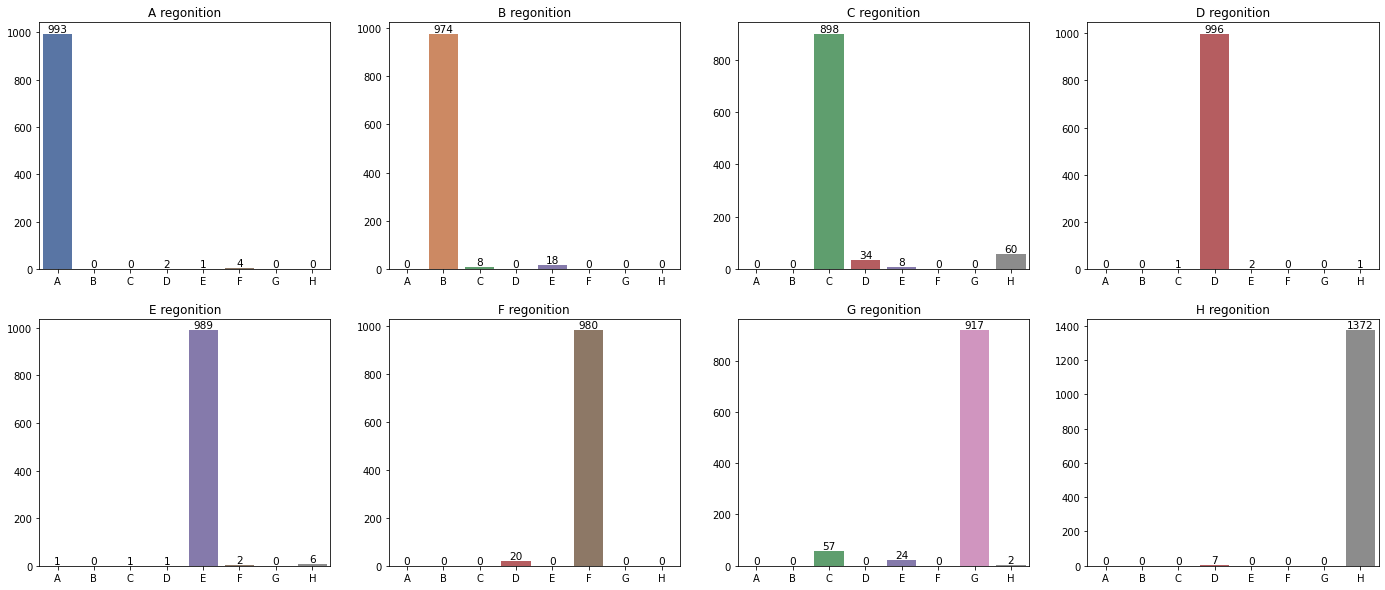

In [27]:
import pandas as pd
import seaborn as sns
current_palette = sns.color_palette()
#dict1 = pd.DataFrame(pd.Series(f1),columns=["numbers"],index=["fire","soil","water","wood","gas","sky","human","life"])
x=["A","B","C","D","E","F","G","H"]
dict1=pd.Series(one1).reindex(["A","B","C","D","E","F","G","H"])
dict1=dict1.fillna(0)
dict2=pd.Series(two1).reindex(["A","B","C","D","E","F","G","H"])
dict2=dict2.fillna(0)
dict3=pd.Series(three1).reindex(["A","B","C","D","E","F","G","H"])
dict3=dict3.fillna(0)
dict4=pd.Series(four1).reindex(["A","B","C","D","E","F","G","H"])
dict4=dict4.fillna(0)
#dict4[np.squeeze(np.argwhere(np.isnan(dict4)))]=0
dict5=pd.Series(five1).reindex(["A","B","C","D","E","F","G","H"])
dict5=dict5.fillna(0)
#dict5[np.squeeze(np.argwhere(np.isnan(dict5)))]=0
dict6=pd.Series(six1).reindex(["A","B","C","D","E","F","G","H"])
dict6=dict6.fillna(0)
#dict6[np.squeeze(np.argwhere(np.isnan(dict6)))]=0
dict7=pd.Series(seven1).reindex(["A","B","C","D","E","F","G","H"])
dict7=dict7.fillna(0)
#dict7[np.squeeze(np.argwhere(np.isnan(dict7)))]=0
dict8=pd.Series(eight1).reindex(["A","B","C","D","E","F","G","H"])
dict8=dict8.fillna(0)
#dict8[np.squeeze(np.argwhere(np.isnan(dict8)))]=0
plt.figure(figsize=(24,10))
plt.subplot(241)
#plt.bar(x,dict1,color="red")
sns.barplot(x,dict1,palette="deep")
plt.title("A regonition")
for i,j in zip(range(8), dict1):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(242)
sns.barplot(x,dict2,palette="deep")
plt.title("B regonition")
for i,j in zip(range(8), dict2):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict2)
plt.subplot(243)
sns.barplot(x,dict3,palette="deep")
plt.title("C regonition")
for i,j in zip(range(8), dict3):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(244)
sns.barplot(x,dict4,palette="deep")
plt.title("D regonition")
for i,j in zip(range(8), dict4):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(245)
sns.barplot(x,dict5,palette="deep")
plt.title("E regonition")
for i,j in zip(range(8), dict5):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(246)
sns.barplot(x,dict6,palette="deep")
plt.title("F regonition")
for i,j in zip(range(8), dict6):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(247)
sns.barplot(x,dict7,palette="deep")
plt.title("G regonition")
for i,j in zip(range(8), dict7):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(248)
sns.barplot(x,dict8,palette="deep")
plt.title("H regonition")
for i,j in zip(range(8), dict8):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
#list1=dict1.values.tolist()
plt.savefig("regonition.png")
plt.show()